# Energy trends and a peek at CO<sub>2</sub> emissions: a global snapshot".

## Introduction.

Energy production and consumption are at the core of technological development, economic growth, and, in general, human well-being. Already from the very beginning of the our civilisation, when early humans figured out how to control fire, allowing them to better resist cold temperatures or to cook their food, energy has been central to our development. The Industrial Revolution, healthcare advancements, food production and storage, transport systems, etc. would never have been possible without increasing production and consumption of energy.<br>
<br>
But there is a dark side to this progress. Energy production comes at a huge environmental cost. We continuously need to extract more and more natural resources to meet the growing demand, and we need to transform those raw materials into usable energy. Mining, drilling, altering water courses, refining and burning raw materials to produce usable forms of energy, etc. have a significant impact on the planet. A clear example of this is gas emissions derived from burning fossil fuels, which greatly contribute to global warming and climate change.<br>
<br>
After the Industrial Revolution that marked a major turning point in human history, coal first and oil later have been the main energy sources powering much of our progress. These provide much of the energy we have consumed and we consume today, but they come with a huge downside: massive CO<sub>2</sub> emissions, with the enormous impact that has on global warming and climate change. In a world with a growing population and rapid technological development, finding sustainable energy sources that meet demand and minimise the impact on the global environment is now more important than ever before.<br>
<br>
In this project, I'll take a closer look at global energy consumption trends, exploring global and regional patterns, the energy mix, and the link between energy consumed and CO<sub>2</sub> emissions. So, without further ado, let's dive right in!

## Data exploration and cleaning.

### Loading libraries & data.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import geopandas as gpd
import matplotlib.cm as cm

For this project, I used data from the 2024 Statistical Review of World Energy (last available) from the Energy Institute, freely available on their <a href=https://www.energyinst.org/statistical-review/resources-and-data-downloads style='text-decoration:none;'>website</a>. This dataset contains historical data on various energy-related variables across multiple countries worldwide, as well as aggregated data by region, geopolitical organisation, and globally.

In [8]:
# importing the data
energy_df_raw = pd.read_csv('Statistical Review of World Energy Narrow File.csv')

### Understanding the data.

In [10]:
# having a look at the first rows
energy_df_raw.head()

,Country,Year,ISO3166_alpha3,ISO3166_numeric,Region,SubRegion,OPEC,EU,OECD,CIS,Var,Value
0,Brazil,2004,BRA,76.0,S. & Cent. America,South America,0.0,0.0,0.0,0.0,biodiesel_cons_kboed,0.000000
1,Brazil,2005,BRA,76.0,S. & Cent. America,South America,0.0,0.0,0.0,0.0,biodiesel_cons_kboed,0.010641
2,Brazil,2006,BRA,76.0,S. & Cent. America,South America,0.0,0.0,0.0,0.0,biodiesel_cons_kboed,1.025554
3,Brazil,2007,BRA,76.0,S. & Cent. America,South America,0.0,0.0,0.0,0.0,biodiesel_cons_kboed,6.026464
4,Brazil,2008,BRA,76.0,S. & Cent. America,South America,0.0,0.0,0.0,0.0,biodiesel_cons_kboed,17.276562


In [11]:
# having a look at the last rows
energy_df_raw.tail()

,Country,Year,ISO3166_alpha3,ISO3166_numeric,Region,SubRegion,OPEC,EU,OECD,CIS,Var,Value
283773,Vietnam,2019,VNM,704.0,Asia Pacific,Asia Pacific,0.0,0.0,0.0,0.0,wind_twh_net,0.71676
283774,Vietnam,2020,VNM,704.0,Asia Pacific,Asia Pacific,0.0,0.0,0.0,0.0,wind_twh_net,0.97218
283775,Vietnam,2021,VNM,704.0,Asia Pacific,Asia Pacific,0.0,0.0,0.0,0.0,wind_twh_net,3.30759
283776,Vietnam,2022,VNM,704.0,Asia Pacific,Asia Pacific,0.0,0.0,0.0,0.0,wind_twh_net,9.00009
283777,Vietnam,2023,VNM,704.0,Asia Pacific,Asia Pacific,0.0,0.0,0.0,0.0,wind_twh_net,11.25333


In [12]:
# having a look at 15 random rows
energy_df_raw.sample(15)

,Country,Year,ISO3166_alpha3,ISO3166_numeric,Region,SubRegion,OPEC,EU,OECD,CIS,Var,Value
76919,Malaysia,1987,MYS,458.0,Asia Pacific,Asia Pacific,0.0,0.0,0.0,0.0,electbyfuel_other,-0.046859
221652,Brazil,1994,BRA,76.0,S. & Cent. America,South America,0.0,0.0,0.0,0.0,refcap_kbd,1473.000000
101457,Total Middle Africa,2018,T-MAFR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,gascons_ej,0.199848
221529,Belarus,1989,BLR,112.0,CIS,CIS,0.0,0.0,0.0,1.0,refcap_kbd,780.000000
259236,Trinidad & Tobago,2006,TTO,780.0,S. & Cent. America,Caribbean,0.0,0.0,0.0,0.0,solar_ej,0.000032
48402,Other Southern Africa,2020,O-SAFR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,co2_mtco2,12.800434
56482,Poland,1993,POL,616.0,Europe,Europe,0.0,1.0,1.0,0.0,coalprod_ej,3.772761
121572,Chile,1995,CHL,152.0,S. & Cent. America,South America,0.0,0.0,1.0,0.0,hydro_ej,0.196017
272288,Slovakia,2002,SVK,703.0,Europe,Europe,0.0,1.0,1.0,0.0,wind_ej,0.000000
45021,Taiwan,1969,TWN,158.0,Asia Pacific,Asia Pacific,0.0,0.0,0.0,0.0,co2_combust_per_ej,70.843936


In [13]:
# shape of the dataframe
energy_df_raw.shape

(283778, 12)

The dataframe contains 283778 rows and 12 columns.

In [15]:
# column names
energy_df_raw.columns

Index(['Country', 'Year', 'ISO3166_alpha3', 'ISO3166_numeric', 'Region',
       'SubRegion', 'OPEC', 'EU', 'OECD', 'CIS', 'Var', 'Value'],
      dtype='object')

In [16]:
# printing a summary of the dataframe
energy_df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283778 entries, 0 to 283777
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Country          283778 non-null  object 
 1   Year             283778 non-null  int64  
 2   ISO3166_alpha3   283778 non-null  object 
 3   ISO3166_numeric  198257 non-null  float64
 4   Region           198257 non-null  object 
 5   SubRegion        198257 non-null  object 
 6   OPEC             198257 non-null  float64
 7   EU               198257 non-null  float64
 8   OECD             198257 non-null  float64
 9   CIS              198257 non-null  float64
 10  Var              283778 non-null  object 
 11  Value            283778 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 26.0+ MB


There is a mix of data types in the different columns. Also, there are missing values in some columns.

Understanding the columns:
- <b>Country</b>: name of the country / aggregated region.
- <b>Year</b>: year of the data.
- <b>ISO3166_alpha3</b>: 3-letter country code.
- <b>ISO3166_numeric</b>: numeric country code. It has missing values. I will drop this column since its information is reduntant with the previous column.
- <b>Region</b>: geographic classification. It has missing values, which seem to correspond with the aggregated regions.
- <b>SubRegion</b>: geographic classification. It has missing values, which seem to correspond with the aggregated regions.
- <b>OPEC</b>: membership indicator (Organisation of the Petroleum Exporting Countries), taking values of 1 and 0. It has missing values, which seem to correspond with the aggregated regions.
- <b>EU</b>: membership indicator (European Union), taking values of 1 and 0. It has missing values, which seem to correspond with the aggregated regions.
- <b>OECD</b>: membership indicator (Organisation for Economic Co-operation and Development), taking values of 1 and 0. It has missing values, which seem to correspond with the aggregated regions.
- <b>CIS</b>: membership indicator (Commonwealth of Independent States), taking values of 1 and 0. It has missing values, which seem to correspond with the aggregated regions.
- <b>Var</b>: type of energy metric.
- <b>Value</b>: actual measurement of the variable stated in the <b>Var</b> column.

In [19]:
# basic descriptive statistics (numeric columns)
energy_df_raw.describe()

,Year,ISO3166_numeric,OPEC,EU,OECD,CIS,Value
count,283778.000000,198257.000000,198257.000000,198257.000000,198257.000000,198257.000000,283778.000000
mean,1997.535485,448.534957,0.099916,0.287944,0.460337,0.056644,584.488324
std,15.988619,259.053732,0.299888,0.452806,0.498426,0.231161,3822.499067
min,1965.000000,12.000000,0.000000,0.000000,0.000000,0.000000,-0.978634
25%,1985.000000,208.000000,0.000000,0.000000,0.000000,0.000000,0.082144
50%,1999.000000,428.000000,0.000000,0.000000,0.000000,0.000000,4.913872
75%,2011.000000,702.000000,0.000000,1.000000,1.000000,0.000000,75.763284
max,2023.000000,894.000000,1.000000,1.000000,1.000000,1.000000,364395.415000


Numeric columns:
- The dataset contains data from the year 1965 until 2023 (<b>Year</b> column).
- The columns <b>OPEC</b>, <b>EU</b>, <b>OECD</b>, and <b>CIS</b> can be considered categorical, with values of 1 for pertenence to those associations and 0 for no pertenence.
- The column <b>ISO3166_numeric</b>, which will be dropped, can also be considered categorical, with a number associated to each country represented in the dataset.
- Finally, the column <b>Value</b> takes a wide range of values. This is due to the fact that it represents measurement of different variables (defined by the <b>Var</b> column), which are also measured in different units.

In [21]:
# basic descriptive statistics (character columns)
energy_df_raw.describe(include='O')

,Country,ISO3166_alpha3,Region,SubRegion,Var
count,283778,283778,198257,198257,283778
unique,141,141,7,12,91
top,Total World,WLD,Europe,Europe,primary_ej_pc
freq,4500,4500,73214,73214,5855


Character columns:
- <b>Country</b>: there are 141 unique values, with <span style='font-size:90%;'>`Total World`</span> being the most frequent (4500 entries).
- <b>ISO3166_alpha3</b>: 141 unique values, with <span style='font-size:90%;'>`WLD`</span> being the most frequent (it corresponds with <span style='font-size:90%;'>`Total World`</span>).
- <b>Region</b>: 7 unique values. The most frequent is <span style='font-size:90%;'>`Europe`</span>, with 73214 entries.
- <b>SubRegion</b>: 12 unique values. The most frequent is <span style='font-size:90%;'>`Europe`</span>, with 73214 entries.
- <b>Var</b>: 91 unique values. The most frequent is <span style='font-size:90%;'>`primary_ej_pc`</span>, with 5855 entries.

I will now look at the unique values in the <b>Country</b> column.

In [24]:
energy_df_raw['Country'].unique()

array(['Brazil', 'Other North America', 'Other S. & Cent. America',
       'Other South America', 'Total Asia Pacific', 'Total CIS',
       'Total EU', 'Total Europe', 'Total Middle East', 'Total Non-OECD',
       'Total North America', 'Total OECD', 'Total S. & Cent. America',
       'Total World', 'US', 'Total Africa', 'Argentina', 'Australia',
       'Austria', 'Belarus', 'Belgium', 'Bulgaria', 'Canada', 'China',
       'China Hong Kong SAR', 'Colombia', 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'Ecuador', 'Estonia', 'Finland',
       'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kazakhstan',
       'Latvia', 'Lithuania', 'Luxembourg', 'Malaysia', 'Mexico',
       'Netherlands', 'New Zealand', 'North Macedonia', 'Norway',
       'Other Africa', 'Other Caribbean', 'Other Europe', 'Peru',
       'Philippines', 'Poland', 'Portugal', 'Romania',
       'Russian Federation', 'Slovakia', 'Slovenia', 

With the aggregates in this column, I decide to drop the <b>Region</b> column, since I will not use it (I will use the aggregate values defined by the aggregates in this row instead of grouping). Similarly, I will drop the <b>SubRegion</b>, <b>OPEC</b>, <b>EU</b>, <b>OECD</b>, and <b>CIS</b> columns, since they won't be needed.

Before dropping the <b>Region</b> column, I will use it to create a new variable called <b>aggregate</b> (since the <b>Region</b> column takes <span style='font-size:95%;'>`NaN`</span> values for the aggregates). This new column will take the values of 1 if the value in the <b>Country</b> column corresponds with a region (i.e., if it has the aggregated values for the World, Europe, etc.).

In [27]:
# double checking the NaN values in the Region column for aggregates
energy_df_raw.loc[energy_df_raw['Region'].isnull(), ['Country', 'Region']].drop_duplicates()

,Country,Region
20,Other North America,NaN
49,Other S. & Cent. America,NaN
108,Other South America,NaN
167,Total Asia Pacific,NaN
226,Total CIS,NaN
255,Total EU,NaN
314,Total Europe,NaN
373,Total Middle East,NaN
419,Total Non-OECD,NaN
478,Total North America,NaN


In [28]:
# this will come in handy later on since it will allow me to select aggregates or single countries using this column
energy_df_raw['aggregate'] = energy_df_raw['Region'].map(
    lambda x: 1 if pd.isnull(x) else 0
)

In [29]:
# checking that the new column was created accordingly
energy_df_raw[['Country', 'aggregate']].drop_duplicates().sample(20)

,Country,aggregate
102773,Brunei,0
3617,Peru,0
4715,Turkiye,0
56001,Mongolia,0
2411,Bulgaria,0
17298,Sri Lanka,0
104280,Other Western Africa,1
2260,Austria,0
14698,Egypt,0
13831,Algeria,0


Next, I want to look at the variables represented in the <b>Var</b> column.

In [31]:
energy_df_raw['Var'].unique()

array(['biodiesel_cons_kboed', 'biodiesel_cons_pj',
       'biodiesel_prod_kboed', 'biodiesel_prod_pj', 'biofuels_cons_ej',
       'biofuels_cons_kbd', 'biofuels_cons_kboed', 'biofuels_cons_pj',
       'biofuels_prod_kbd', 'biofuels_prod_kboed', 'biofuels_prod_pj',
       'biogeo_ej', 'biogeo_twh', 'biogeo_twh_net', 'co2_combust_mtco2',
       'co2_combust_pc', 'co2_combust_per_ej', 'co2_mtco2', 'coalcons_ej',
       'coalprod_ej', 'coalprod_mt', 'cobalt_kt', 'cobaltres_kt',
       'diesel_gasoil_cons_kbd', 'elect_twh', 'electbyfuel_coal',
       'electbyfuel_gas', 'electbyfuel_hydro', 'electbyfuel_nuclear',
       'electbyfuel_oil', 'electbyfuel_other', 'electbyfuel_ren_power',
       'electbyfuel_total', 'ethanol_cons_kboed', 'ethanol_cons_pj',
       'ethanol_prod_kboed', 'ethanol_prod_pj', 'fuel_oil_cons_kbd',
       'gascons_bcfd', 'gascons_bcm', 'gascons_ej', 'gasflared_bcm',
       'gasflared_mtco2', 'gasoline_cons_kbd', 'gasprod_bcfd',
       'gasprod_bcm', 'gasprod_ej', 'graph

The definitions of each variable can be found <a href=https://www.energyinst.org/__data/assets/excel_doc/0020/1540505/Consolidated-Dataset-Narrow-Format-Glossary.xlsx style='text-decoration: none;'>here</a>. Other than energy consumption and production measurements (using different units), it's possible to find other variables like population or different CO<sub>2</sub>-related measurements.

### Cleaning the data.

I start by dropping columns I won't need.

In [35]:
energy_df = energy_df_raw.drop(columns=['ISO3166_numeric', 'Region', 'SubRegion', 'OPEC', 'EU', 'OECD', 'CIS'])

In [36]:
# having a look at the head of the dataframe after dropping the columns that are not needed
energy_df.head()

,Country,Year,ISO3166_alpha3,Var,Value,aggregate
0,Brazil,2004,BRA,biodiesel_cons_kboed,0.000000,0
1,Brazil,2005,BRA,biodiesel_cons_kboed,0.010641,0
2,Brazil,2006,BRA,biodiesel_cons_kboed,1.025554,0
3,Brazil,2007,BRA,biodiesel_cons_kboed,6.026464,0
4,Brazil,2008,BRA,biodiesel_cons_kboed,17.276562,0


I won't use all the variables stated in the <b>Var</b> column, but I will leave it as it is (at least) for now.<br>
Next, I will clean some of the names in the <b>Country</b> column.

In [38]:
# cleaning up some Country/aggregate names (replacing US for USA, S. & Cent. for South & Central, etc.)
energy_df['Country'] = energy_df['Country'].replace({
    'US': 'United States',
    'Other S. & Cent. America': 'Other South & Central America',
    'Total S. & Cent. America': 'South & Central America',
    'Total Europe': 'Europe',
    'Total Asia Pacific': 'Asia Pacific',
    'Total North America': 'North America',
    'Total CIS': 'CIS',
    'Total Africa': 'Africa',
    'Total Middle East': 'Middle East',
    'Total EU': 'European Union',
    'Total World': 'World',
    'China Hong Kong SAR': 'Hong Kong',
    'Russian Federation': 'Russia',
    'Turkiye': 'Türkiye',
    'Curacao': 'Curaçao'
})

Now, I will look at the missing values. I expect the data to be relatively clean.

In [40]:
energy_df.isnull().sum()

Country           0
Year              0
ISO3166_alpha3    0
Var               0
Value             0
aggregate         0
dtype: int64

No missing values, which is good. Now, time to drop duplicates, if any.

In [42]:
energy_df.drop_duplicates(inplace=True)

In [43]:
energy_df.shape

(283778, 6)

I can see that the number of rows didn't change, which means that there were no duplicates.

### Final tweaks.

I will now select the variables in the <b>Var</b> column I will use, and next I'll create a new variable.

In [47]:
# creation of a vector with the variables I will use
vars_to_keep = ['biofuels_cons_ej', 'biogeo_ej', 'co2_mtco2', 'coalcons_ej', 'gascons_ej', 'hydro_ej', 'nuclear_ej',
               'oilcons_ej', 'pop', 'primary_ej', 'primary_ej_pc', 'ren_power_ej', 'solar_ej', 'wind_ej']

# using the vector above to filter by using the column Var
energy_df = energy_df[energy_df['Var'].isin(vars_to_keep)].reset_index(drop=True)

In [48]:
energy_df.shape

(69862, 6)

With this step, the dataframe is now reduced to a bit less than 70000 rows.<br>
The next step is to create the a new variable, CO<sub>2</sub> emissions per capita (<b>co2_em_pc</b>). To do this, I will first reshape the dataframe, from long to wide. This will also make things easier down the road during this project.

In [50]:
# reshaping the dataframe
energy_df = energy_df.pivot_table(index=['Country', 'Year', 'ISO3166_alpha3', 'aggregate'],
                                 columns='Var', values='Value').reset_index()

In [51]:
# having a look at the dataframe after reshaping
energy_df

Var,Country,Year,ISO3166_alpha3,aggregate,biofuels_cons_ej,biogeo_ej,co2_mtco2,coalcons_ej,gascons_ej,hydro_ej,nuclear_ej,oilcons_ej,pop,primary_ej,primary_ej_pc,ren_power_ej,solar_ej,wind_ej
0,Africa,1965,T-AFR,1,NaN,NaN,NaN,1.164586,0.034459,0.148028,0.000000,1.231681,321.446988,2.578754,8.022331,0.000000,NaN,0.000000
1,Africa,1966,T-AFR,1,NaN,NaN,NaN,1.163240,0.038513,0.165106,0.000000,1.333620,329.658038,2.700480,8.191760,0.000000,NaN,0.000000
2,Africa,1967,T-AFR,1,NaN,NaN,NaN,1.189050,0.038066,0.172352,0.000000,1.329097,338.159593,2.728564,8.068865,0.000000,NaN,0.000000
3,Africa,1968,T-AFR,1,NaN,NaN,NaN,1.236646,0.038582,0.201602,0.000000,1.405317,346.980005,2.882146,8.306376,0.000000,NaN,0.000000
4,Africa,1969,T-AFR,1,NaN,NaN,NaN,1.247914,0.045073,0.235268,0.000000,1.433352,356.070249,2.961606,8.317478,0.000000,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5850,World,2019,WLD,1,4.030660,7.428862,39127.26056,156.949795,140.704034,40.265127,25.458413,193.028140,7764.748498,588.047730,75.733004,27.611560,6.694548,13.488151
5851,World,2020,WLD,1,3.852981,7.854032,37188.88126,152.268069,139.370733,41.216665,24.396717,175.484465,7840.749206,567.603829,72.391530,31.014198,8.082966,15.077200
5852,World,2021,WLD,1,4.071689,8.464299,39071.11469,160.560291,144.860462,40.400871,25.333451,185.509786,7909.090518,596.624528,75.435289,35.887978,9.906313,17.517366
5853,World,2022,WLD,1,4.295614,8.691494,39587.99078,161.528843,144.312764,40.578501,24.133947,191.616620,7974.899282,607.349529,76.157643,40.883240,12.407067,19.784678


In [52]:
# creating the new variable co2_em_pc (the population column is given in million people)
energy_df['co2_em_pc'] = energy_df['co2_mtco2'] / (energy_df['pop'] * 1000000)

# adjusting the units (from million tonnes to tonnes per capita)
energy_df['co2_em_pc'] = energy_df['co2_em_pc'] * 1000000

In [53]:
# final check of the data
energy_df

Var,Country,Year,ISO3166_alpha3,aggregate,biofuels_cons_ej,biogeo_ej,co2_mtco2,coalcons_ej,gascons_ej,hydro_ej,nuclear_ej,oilcons_ej,pop,primary_ej,primary_ej_pc,ren_power_ej,solar_ej,wind_ej,co2_em_pc
0,Africa,1965,T-AFR,1,NaN,NaN,NaN,1.164586,0.034459,0.148028,0.000000,1.231681,321.446988,2.578754,8.022331,0.000000,NaN,0.000000,NaN
1,Africa,1966,T-AFR,1,NaN,NaN,NaN,1.163240,0.038513,0.165106,0.000000,1.333620,329.658038,2.700480,8.191760,0.000000,NaN,0.000000,NaN
2,Africa,1967,T-AFR,1,NaN,NaN,NaN,1.189050,0.038066,0.172352,0.000000,1.329097,338.159593,2.728564,8.068865,0.000000,NaN,0.000000,NaN
3,Africa,1968,T-AFR,1,NaN,NaN,NaN,1.236646,0.038582,0.201602,0.000000,1.405317,346.980005,2.882146,8.306376,0.000000,NaN,0.000000,NaN
4,Africa,1969,T-AFR,1,NaN,NaN,NaN,1.247914,0.045073,0.235268,0.000000,1.433352,356.070249,2.961606,8.317478,0.000000,NaN,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5850,World,2019,WLD,1,4.030660,7.428862,39127.26056,156.949795,140.704034,40.265127,25.458413,193.028140,7764.748498,588.047730,75.733004,27.611560,6.694548,13.488151,5.039089
5851,World,2020,WLD,1,3.852981,7.854032,37188.88126,152.268069,139.370733,41.216665,24.396717,175.484465,7840.749206,567.603829,72.391530,31.014198,8.082966,15.077200,4.743026
5852,World,2021,WLD,1,4.071689,8.464299,39071.11469,160.560291,144.860462,40.400871,25.333451,185.509786,7909.090518,596.624528,75.435289,35.887978,9.906313,17.517366,4.940026
5853,World,2022,WLD,1,4.295614,8.691494,39587.99078,161.528843,144.312764,40.578501,24.133947,191.616620,7974.899282,607.349529,76.157643,40.883240,12.407067,19.784678,4.964074


In [54]:
energy_df.shape

(5855, 19)

In [55]:
energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5855 entries, 0 to 5854
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           5855 non-null   object 
 1   Year              5855 non-null   int64  
 2   ISO3166_alpha3    5855 non-null   object 
 3   aggregate         5855 non-null   int64  
 4   biofuels_cons_ej  2655 non-null   float64
 5   biogeo_ej         5058 non-null   float64
 6   co2_mtco2         3230 non-null   float64
 7   coalcons_ej       5560 non-null   float64
 8   gascons_ej        5296 non-null   float64
 9   hydro_ej          5614 non-null   float64
 10  nuclear_ej        4302 non-null   float64
 11  oilcons_ej        5855 non-null   float64
 12  pop               5855 non-null   float64
 13  primary_ej        5855 non-null   float64
 14  primary_ej_pc     5855 non-null   float64
 15  ren_power_ej      5101 non-null   float64
 16  solar_ej          4775 non-null   float64


The dataframe now contains 5855 rows and 19 columns (some of them with missing values, likely representing no measurement for specific countries and years).

In [57]:
energy_df.columns.name = None

In [58]:
# saving the transformed dataframe to a csv file
#energy_df.to_csv('global_energy_df.csv', index=False)

## 1. Global primary energy consumption.

Primary energy consumed refers to the total amount of energy used in its raw form (i.e., before any coversion losses, like inefficiencies in electricity generation, etc.). This includes fossil fuels, nuclear and renewable energy, and it provides a snapshot of the energy demand in a given territory. In addition, it is also a good indicator of economic activity and technological development.<br>
<br>
I'll kick off this analysis by looking at how the global primary energy consumption has evolved over the years. It's important to keep in mind that the energy consumption is closely tied to population growth, so let's plot both the global primary energy consumption and the world population to get a clearer picture.

In [61]:
global_energy_cons = energy_df.loc[energy_df['Country'] == 'World', \
    ['Year', 'Country', 'primary_ej', 'primary_ej_pc', 'pop']].reset_index(drop=True)

global_energy_cons.head()

,Year,Country,primary_ej,primary_ej_pc,pop
0,1965,World,156.100928,46.778929,3336.992324
1,1966,World,164.640358,48.334133,3406.295874
2,1967,World,170.681279,49.112315,3475.325445
3,1968,World,180.891142,51.002855,3546.686599
4,1969,World,193.324256,53.396677,3620.529749


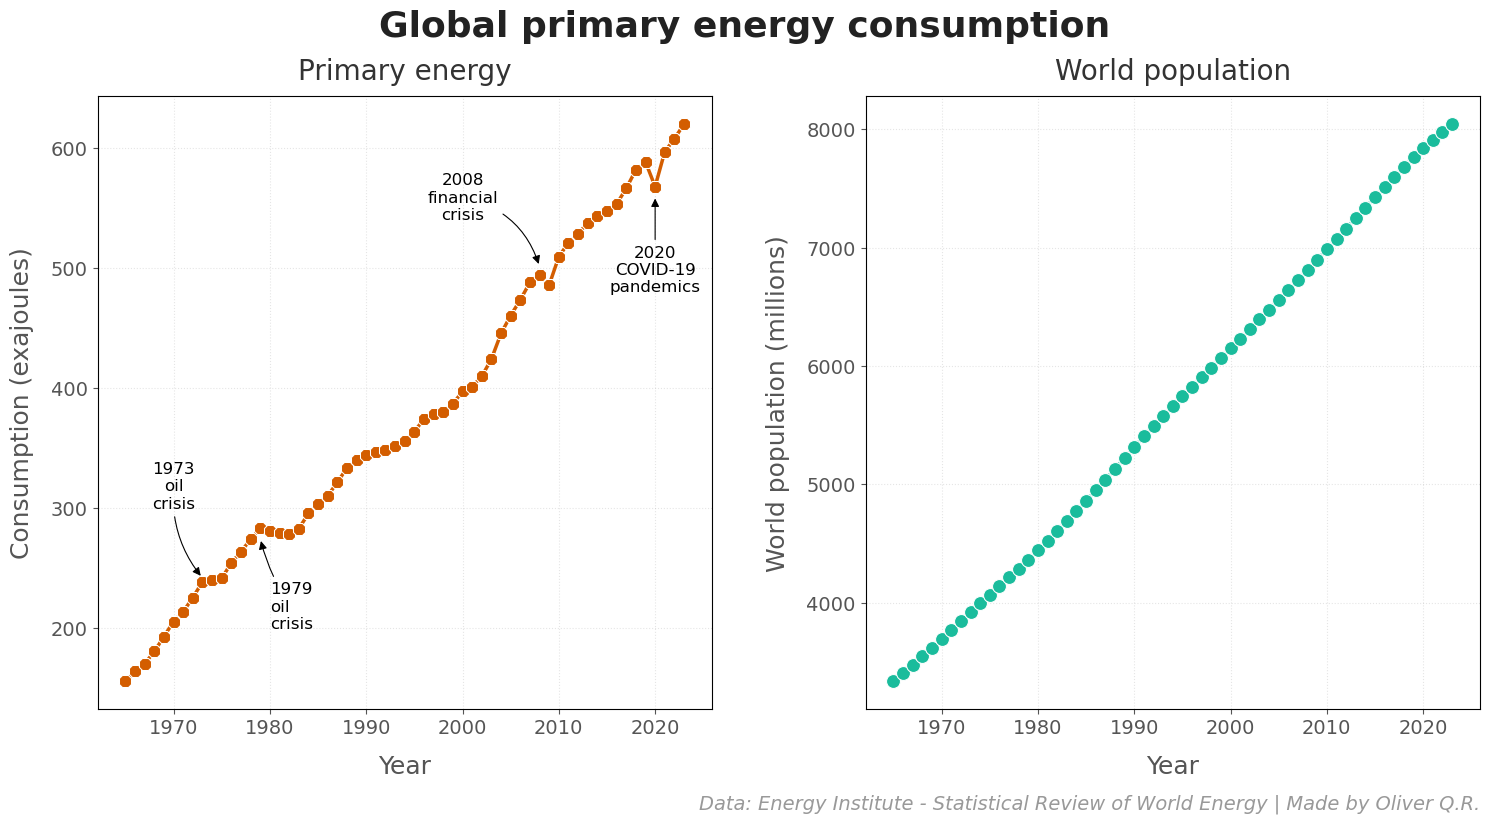

In [62]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8))

# global primary energy consumption
sns.lineplot(data=global_energy_cons, x='Year', y='primary_ej', color='#d35d00', linewidth=2.5, marker='8', markersize=10,
            ax=ax[0])
ax[0].set_title('Primary energy', size=20, color='#333', pad=12)
ax[0].set_ylabel('Consumption (exajoules)', color='#555', size=18, labelpad=12)
ax[0].set_xlabel('Year', color='#555', size=18, labelpad=12)
ax[0].grid(True, linestyle=':', color='grey', alpha=0.2)

# world population
sns.lineplot(data=global_energy_cons, x='Year', y='pop', color='#1abc9c', linewidth=2.5, marker='o', markersize=10,
            ax=ax[1])
ax[1].set_title('World population', size=20, color='#333', pad=12)
ax[1].set_xlabel('Year', size=18, color='#555', labelpad=12)
ax[1].set_ylabel('World population (millions)', size=18, color='#555', labelpad=12)
ax[1].grid(True, linestyle=':', color='grey', alpha=0.2)

for axis in ax:
    axis.tick_params(axis='both', which='major', colors='#555', labelsize=14)


# annotations
ax[0].annotate('1973\noil\ncrisis', xy=(1973, 242), xytext=(1970, 300), ha='center', fontsize=12,
               arrowprops={'arrowstyle': '-|>', 
                           'linewidth': 0.8,
                           'color': 'black',
                           'connectionstyle': 'arc3,rad=0.2'})

ax[0].annotate('1979\noil\ncrisis', xy=(1979, 275), xytext=(1980, 200), ha='left', fontsize=12,
               arrowprops={'arrowstyle': '-|>', 
                           'linewidth': 0.8,
                           'color': 'black',
                           'connectionstyle': 'arc3,rad=-0.1'})

ax[0].annotate('2008\nfinancial\ncrisis', xy=(2008, 501), xytext=(2000, 540), ha='center', fontsize=12,
               arrowprops={'arrowstyle': '-|>', 
                           'linewidth': 0.8,
                           'color': 'black',
                           'connectionstyle': 'arc3,rad=-0.3'})

ax[0].annotate('2020\nCOVID-19\npandemics', xy=(2020, 560), xytext=(2020, 480), ha='center', fontsize=12,
               arrowprops={'arrowstyle': '-|>', 
                           'linewidth': 0.8,
                           'color': 'black'})


plt.suptitle('Global primary energy consumption', size=26, color='#222', fontweight='bold')
plt.figtext(0.99, -0.02, 'Data: Energy Institute - Statistical Review of World Energy | Made by Oliver Q.R.', ha='right',\
           color='#999', size=14, fontstyle='italic')
plt.tight_layout()
plt.subplots_adjust(wspace=0.25)

#plt.savefig('figures/Fig01_Global primary energy consumption.png', bbox_inches='tight')

plt.show()

Primary energy consumption worldwide has steadily increased over the last few decades, in line with a growing world population. It's interesting to see a few small dips in energy consumption along the way. For instance, there were recent drops in 2008 and 2020, which align with the 2008 financial crisis and the COVID-19 pandemics, respectively. These drops didn't last long, and the primary energy consumption increased to higher levels the following year.<br>
<br>
Similarly, if we go a bit further back in time, we can also see two small plateaus (1973-5 and 1979-83), which coincide with the 1973 and 1979 oil crisis, respectively.

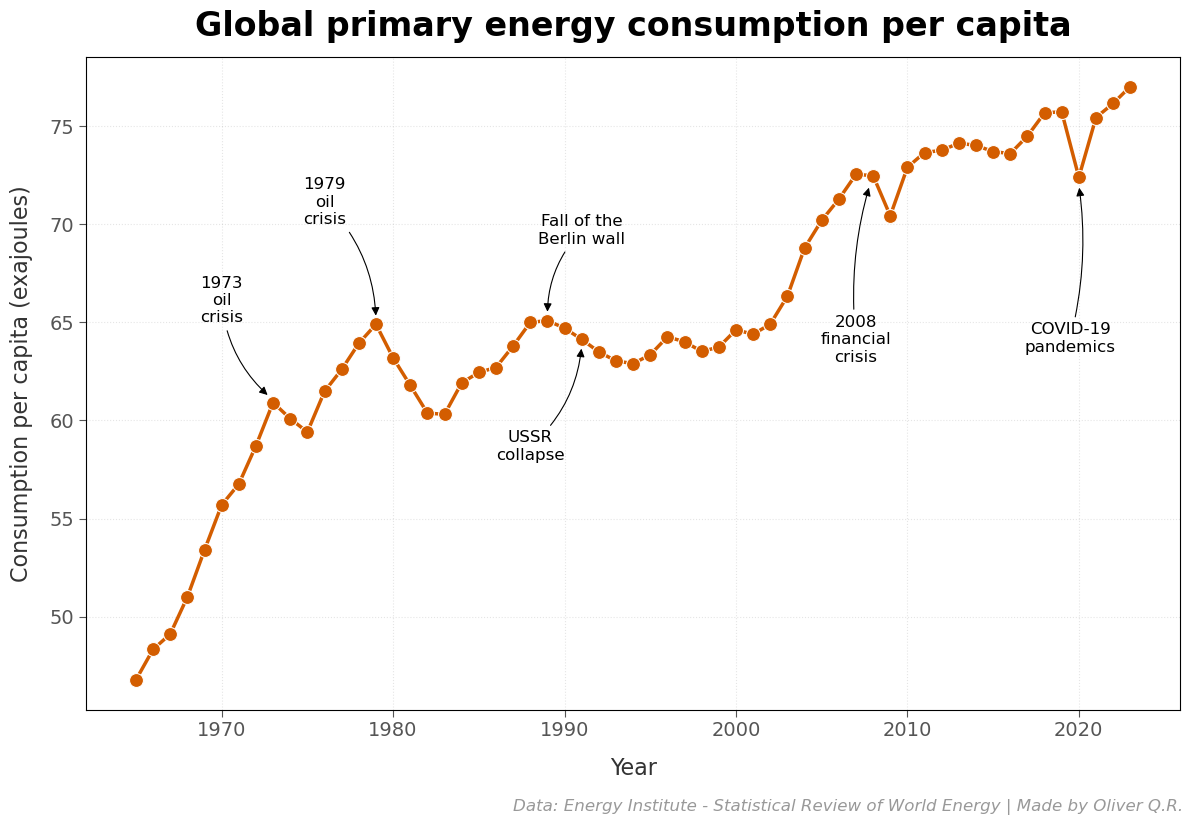

In [64]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.lineplot(data=global_energy_cons, x='Year', y='primary_ej_pc', color='#d35d00', linewidth=2.5, marker='o',
            markersize=10, ax=ax)

plt.title('Global primary energy consumption per capita', size=24, fontweight='bold', pad=15)
plt.xlabel('Year', size=16, color='#333', labelpad=12)
plt.ylabel('Consumption per capita (exajoules)', size=16, color='#333', labelpad=12)
plt.xticks(color='#555', size=14)
plt.yticks(color='#555', size=14)
plt.tick_params(axis='both', color='#555', size=5)

# adding annotations
ax.annotate('1973\noil\ncrisis', xy=(1972.8, 61.2), xytext=(1970, 65), ha='center', fontsize=12, 
            arrowprops={'arrowstyle': '-|>', 
                        'linewidth': 0.8, 
                        'color': 'black', 
                        'connectionstyle': 'arc3,rad=0.2'})

ax.annotate('1979\noil\ncrisis', xy=(1979, 65.2), xytext=(1976, 70), ha='center', fontsize=12, 
            arrowprops={'arrowstyle': '-|>', 
                        'linewidth': 0.8, 
                        'color': 'black', 
                        'connectionstyle': 'arc3,rad=-0.2'})

ax.annotate('Fall of the\nBerlin wall', xy=(1989, 65.4), xytext=(1991, 69), ha='center', fontsize=12, 
            arrowprops={'arrowstyle': '-|>', 
                        'linewidth': 0.8, 
                        'color': 'black', 
                        'connectionstyle': 'arc3,rad=0.2'})

ax.annotate('USSR\ncollapse', xy=(1991, 63.8), xytext=(1988, 58), ha='center', fontsize=12, 
            arrowprops={'arrowstyle': '-|>', 
                        'linewidth': 0.8, 
                        'color': 'black', 
                        'connectionstyle': 'arc3,rad=0.2'})

ax.annotate('2008\nfinancial\ncrisis', xy=(2007.8, 72), xytext=(2007, 63), ha='center', fontsize=12, 
            arrowprops={'arrowstyle': '-|>', 
                        'linewidth': 0.8, 
                        'color': 'black', 
                        'connectionstyle': 'arc3,rad=-0.1'})

ax.annotate('COVID-19\npandemics', xy=(2020, 72), xytext=(2019.5, 63.5), ha='center', fontsize=12, 
            arrowprops={'arrowstyle': '-|>', 
                        'linewidth': 0.8, 
                        'color': 'black', 
                        'connectionstyle': 'arc3,rad=0.1'})


plt.figtext(0.99, -0.02, 'Data: Energy Institute - Statistical Review of World Energy | Made by Oliver Q.R.', ha='right',\
           color='#999', size=12, fontstyle='italic')
plt.grid(True, linestyle=':', color='grey', alpha=0.2)
plt.tight_layout()

#plt.savefig('figures/Fig02_Global primary energy consumption per capita.png', bbox_inches='tight')

plt.show()

The primary energy consumption per capita has also increased over time, with some fluctuations, and at a slower rate than total global primary energy consumption. There was a sharp rise from 1965 (the earliest data) until 1973. After this, likely due to the 1973 oil crisis, consumption per capita dropped slightly in 1974-5. This was followed by another sharp increase until the 1979 oil crisis, which likely caused another dip in the early 1980s.<br>
<br>
After this, there was an upward trend through the middle and late 1980s, before consumption dropped again, possibly as a consequence of events like the economic reforms associated with the USSR's Perestroika, the fall of the Berlin Wall, and the collapse of the USSR. These events led to, among other things, the closure of energy-intensive industries or a drastic reduction in production, which impacted energy consumption.<br>
<br>
China's economic reforms in the 1980s and 1990s led the country to a rapid industrialisation process and its integration into the global economy. The modern era of globalisation had begun, and China quickly became a major manufacturing hub (in a way, <i>the factory of the world</i>). This helped mitigate the dip in energy consumption and, as China and other countries developed, energy consumption significantly rose again until the late 2000s, when the 2008 financial crisis struck.<br>
<br>
In the first half of the 2010s, consumption per capita remained relatively stable. The effects of the 2008 financial crash, growing awareness of energy efficiency, and the shift towards more sustainable energy could be among the factors that explain this phenomenon.<br>
<br>
Economic growth resumed in the late 2010s, and consumption per capita started climb again until 2020. Then, the COVID-19 pandemics hit, and much of the world went into a lockdown, causing a dip in energy consumption per capita. However, this effect didn't last long, and the world quickly recovered. Energy consumption levels bounced back and have remained on a sharp upward trend since 2021, reaching an all-time high in 2023.

## 2. Energy consumption by region.

We've just seen that the primary energy consumption has steadily increased over time, reaching its highest level in 2023. But, if we look at a regional level, is this trend the same everywhere, or are there significant differences across different parts of the world? To answer this, let's take a look at the primary energy consumption per capita across the main regions defined in the dataset (Asia Pacific, CIS, Europe, Middle East, North America, South & Central America, and Africa).

In [68]:
# main regions in the dataset
regions = ['Asia Pacific', 'CIS', 'Europe', 'Middle East', 'North America',
          'South & Central America', 'Africa']

# dataframe with the aggregated data by region
energy_cons_region = energy_df[energy_df['Country'].isin(regions)].rename(columns={'Country': 'region'})

# checking the first rows of the newly created dataframe
energy_cons_region.head()

,region,Year,ISO3166_alpha3,aggregate,biofuels_cons_ej,biogeo_ej,co2_mtco2,coalcons_ej,gascons_ej,hydro_ej,nuclear_ej,oilcons_ej,pop,primary_ej,primary_ej_pc,ren_power_ej,solar_ej,wind_ej,co2_em_pc
0,Africa,1965,T-AFR,1,NaN,NaN,NaN,1.164586,0.034459,0.148028,0.0,1.231681,321.446988,2.578754,8.022331,0.0,NaN,0.0,NaN
1,Africa,1966,T-AFR,1,NaN,NaN,NaN,1.163240,0.038513,0.165106,0.0,1.333620,329.658038,2.700480,8.191760,0.0,NaN,0.0,NaN
2,Africa,1967,T-AFR,1,NaN,NaN,NaN,1.189050,0.038066,0.172352,0.0,1.329097,338.159593,2.728564,8.068865,0.0,NaN,0.0,NaN
3,Africa,1968,T-AFR,1,NaN,NaN,NaN,1.236646,0.038582,0.201602,0.0,1.405317,346.980005,2.882146,8.306376,0.0,NaN,0.0,NaN
4,Africa,1969,T-AFR,1,NaN,NaN,NaN,1.247914,0.045073,0.235268,0.0,1.433352,356.070249,2.961606,8.317478,0.0,NaN,0.0,NaN


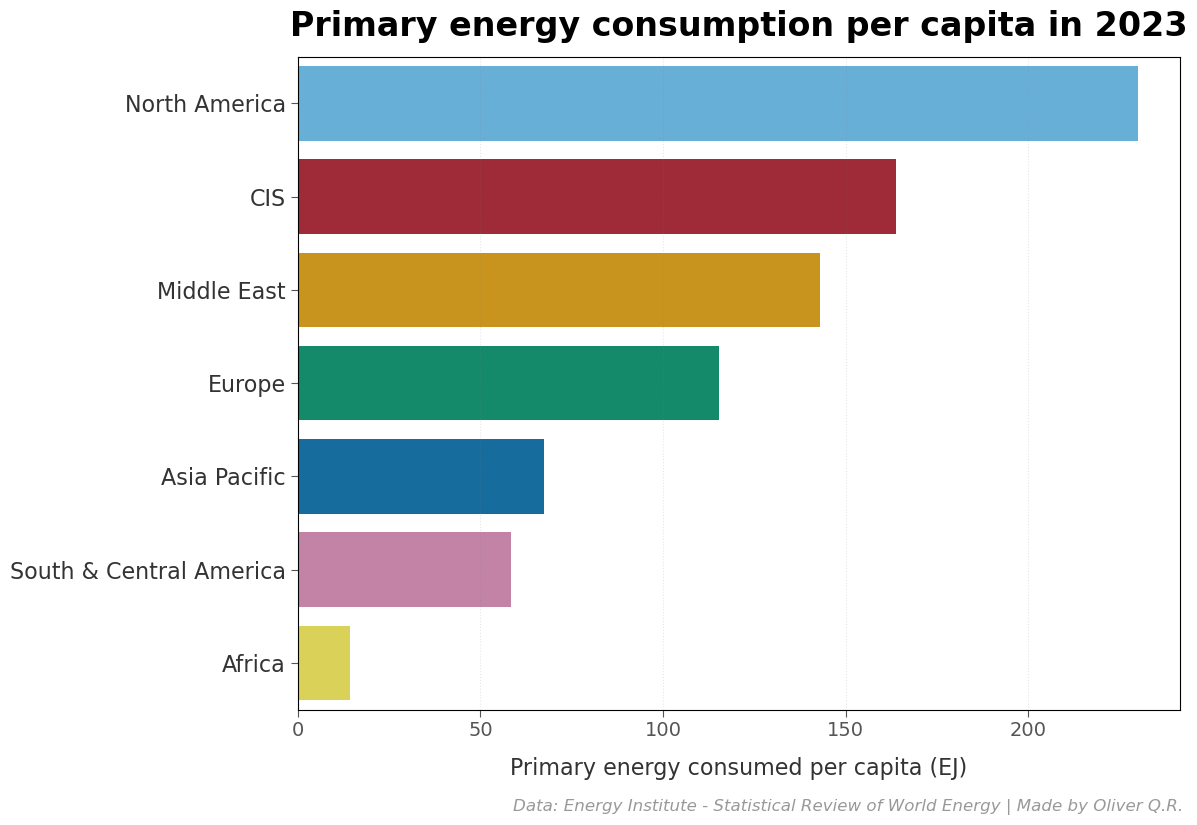

In [69]:
# colour palette for the graph
region_colours = {'Asia Pacific': '#0072b2',
                 'Europe': '#009e73',
                 'CIS': '#b2182b',
                 'Middle East': '#e69f00',
                 'Africa': '#f0e442',
                 'North America': '#56b4e9',
                 'South & Central America': '#cc79a7'}

# selecting the year of the most recent data in the dataset
last_year = energy_cons_region['Year'].max()

# creating a bargraph with the primary energy consumption per capita and region (last data available)
plt.figure(figsize=(12, 8))

sns.barplot(data=energy_cons_region[energy_cons_region['Year'] == last_year].sort_values(by='primary_ej_pc', ascending=False), 
            x='primary_ej_pc', y='region', 
            hue='region', palette=region_colours, legend=None)

plt.title(f"Primary energy consumption per capita in {last_year}", size=24, fontweight='bold', pad=15)
plt.xlabel('Primary energy consumed per capita (EJ)', size=16, color='#333', labelpad=12)
plt.ylabel('')
plt.xticks(color='#555', size=14)
plt.yticks(color='#333', size=16)
plt.tick_params(axis='both', color='#555', size=5)

plt.figtext(0.99, -0.02, 'Data: Energy Institute - Statistical Review of World Energy | Made by Oliver Q.R.', ha='right',\
           color='#999', size=12, fontstyle='italic')
plt.grid(True, axis='x', linestyle=':', color='grey', alpha=0.2)
plt.tight_layout()

#plt.savefig('figures/Fig03_Primary energy cons pc by region in 2023.png', bbox_inches='tight')

plt.show()

There was a significant disparity in the energy consumed per capita across different regions in 2023. North America topped the list (with around 230 EJ per capita), followed by the Commonwealth of Independent States (with 163.7 EJ per capita, notably lower than North America). The Middle East followed with 142.9 EJ per capita, and Europe was in fourth (115.2 EJ per capita). At the other end, Asia Pacific was fifth (67.3 EJ per capita), South & Central America sixth (58.3 EJ per capita), whereas Africa sat at the bottom (with 14.3 EJ per capita).

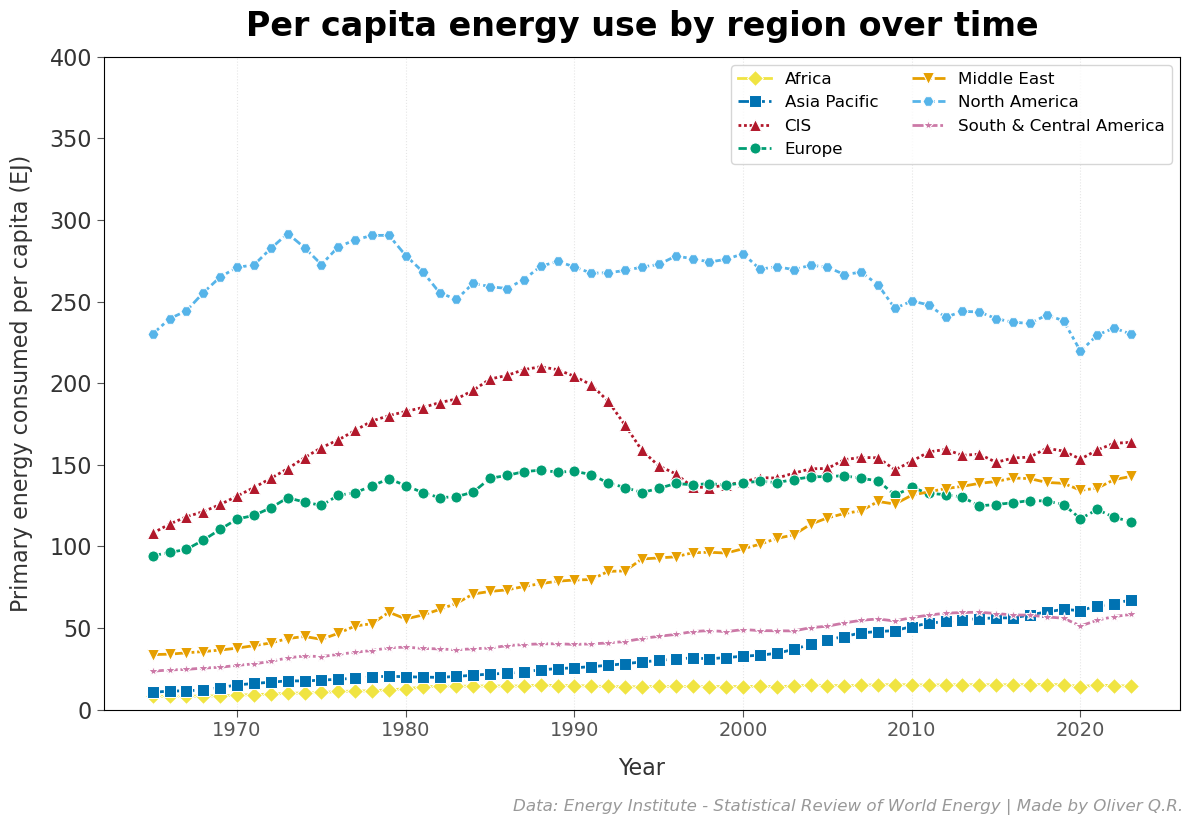

In [71]:
# markers for each region
region_markers = {'Asia Pacific': 's',
                 'Europe': 'o',
                 'CIS': '^',
                 'Middle East': 'v',
                 'Africa': 'D',
                 'North America': 'H',
                 'South & Central America': '*'}

# creating a line plot to see the evolution of the primary energy consumed per capita by region
plt.figure(figsize=(12, 8))

sns.lineplot(data=energy_cons_region, x='Year', y='primary_ej_pc', hue='region', palette=region_colours, 
             style='region', markers=region_markers, linewidth=2, markersize=8)

plt.title('Per capita energy use by region over time', size=24, fontweight='bold', pad=15)
plt.xlabel('Year', size=16, color='#333', labelpad=12)
plt.ylabel('Primary energy consumed per capita (EJ)', size=16, color='#333', labelpad=12)
plt.xticks(color='#555', size=14)
plt.yticks(color='#333', size=16)
plt.tick_params(axis='both', color='#555', size=5)
plt.ylim(0, 400)

plt.legend(loc='upper right', ncol=2, prop={'size': 12})

plt.figtext(0.99, -0.02, 'Data: Energy Institute - Statistical Review of World Energy | Made by Oliver Q.R.', ha='right',\
           color='#999', size=12, fontstyle='italic')
plt.grid(True, axis='x', linestyle=':', color='grey', alpha=0.2)
plt.tight_layout()

#plt.savefig('figures/Fig04_Primary energy cons pc by region over time.png', bbox_inches='tight')

plt.show()

Already back in 1965 North America was the region with the largest consumption per capita in 1965, reaching its peak in the 1970s. After 1979, there is a small and steady decline over time, becaming more noticeably after the turn of the century. Whereas the oil crisis in the 1970s could have had a role in 1980s, the decline observed in the last 20-25 could possibly be linked to two main factors: industrial delocalisation and improvement of energy efficiency.<br>
<br>
The Commonwealth of Independent States saw an increase in consumption until late 1980s. After this point, that coincides with the collapse of the USSR, there was a sharp drop in consumption per capita until the late 1990s, even falling behind Europe for a brief period of time. Since then, there has been a subtle upwards trend until 2023.<br>
<br>
Europe's consumption has remained somewhat stable over the last 60 years. There was an increasing trend from the 1960s until the mid 1980s. After this, the consumption per capita in Europe remained more or less stable until the late 2000s, when a small and gradual decrease started, continuing through to 2023. Like North America, this constant decrease could relate to both energy efficiency and industrial delocalisation.<br>
<br>
The Middle East stands out for having the most pronounced increase in primary energy consumption per capita over the last decades. This rise is gradual and almost continuous, to the point that, from 2011, this regions's consumption per capita is larger than Europe's and keeps closing in on the CIS's. This growth is likely tied to the region's development and modernisation in recent decades, driven by the oil and natural gas industries.<br>
<br>
Asia Pacific has also seen a significant rise in consumption over the last decades, recently surpassing South & Central America. This increase is more noticeable in the last 30 years, which could be explained by rapid industrialisation (with China becoming somehow the factory of the world) and a higher level of urbanisation.<br>
<br>
South & Central America shows a subtle upwards trend, but very slow. There was even a small dip in the late 2010s, with a quick recovery after that.<br>
<br>
Finally, Africa's per capita consumption has also grown over the past 60 years (from ~8 EJ in 1965 to ~14 in 2023). It is interesting to see that there wasn't much of a difference between Africa and Asia Pacific until the 1990s. Since then, Asia Pacific's consumption started increasing at a much higher rate than Africa's. In Africa, the energy consumption per capita remains relatively low, probably due to lack of industrialisation and limited access to resources.

## 3. Top energy consumers.

Now that we have looked at the regions with the highest consumption per capita, let's zoom in a bit further, down to the country level. Which countries had the largest primary energy consumption in 2023? Let's find out!

In [75]:
top20_largest_cons = energy_df.loc[(energy_df['Year'] == last_year) & (energy_df['aggregate'] == 0),\
    ['Country', 'primary_ej_pc']].sort_values(by='primary_ej_pc', ascending=False).reset_index(drop=True).head(20)

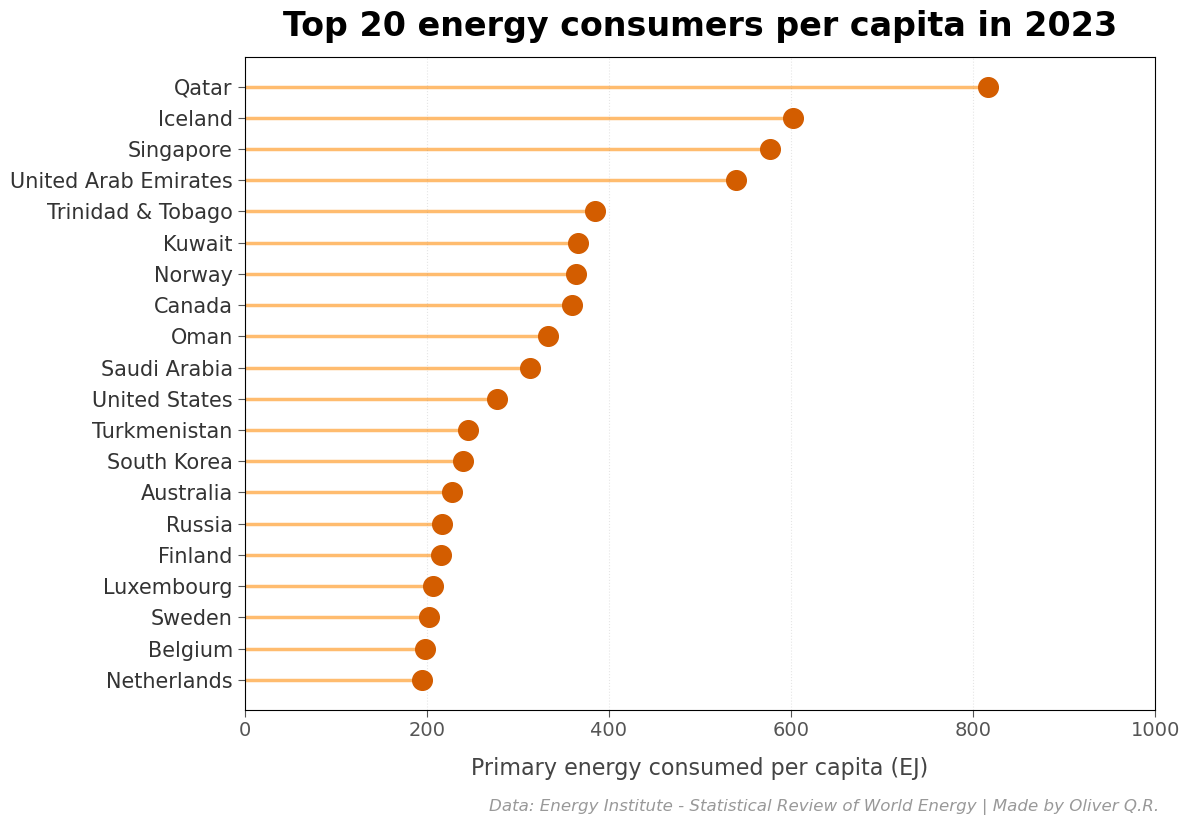

In [76]:
plt.figure(figsize=(12, 8))

plt.hlines(y=top20_largest_cons['Country'], xmin=0, xmax=top20_largest_cons['primary_ej_pc'], color='#ffbc6f',
           linewidth=2.5, zorder=1)
plt.scatter(top20_largest_cons['primary_ej_pc'], top20_largest_cons['Country'], marker='o', s=200, color='#d35d00', 
            zorder=2)
plt.gca().invert_yaxis()
plt.xlim(0, 1000)

plt.title(f"Top 20 energy consumers per capita in {last_year}", size=24, fontweight='bold', pad=15)
plt.xlabel('Primary energy consumed per capita (EJ)', size=16, color='#444444', labelpad=12)
plt.ylabel('')
plt.xticks(color='#555', size=14)
plt.yticks(color='#333', size=15)
plt.tick_params(axis='both', color='#555', size=5)

plt.figtext(0.97, -0.02, 'Data: Energy Institute - Statistical Review of World Energy | Made by Oliver Q.R.', ha='right',\
           color='#999', size=12, fontstyle='italic')
plt.grid(True, axis='x', linestyle=':', color='grey', alpha=0.2)
plt.tight_layout()

#plt.savefig('figures/Fig05_Top 20 energy consumers per capita in 2023.png', bbox_inches='tight')

plt.show()

In 2023, Qatar was by far the country with the largest primary energy consumption per capita (around 817 EJ/per capita), followed by Iceland and Singapore (~603 and ~577 EJ / per capita, respectively). Among the top consumers, we can find several oil- and natural gas-producing countries from the Middle East, like Qatar, United Arab Emirates, Saudi Arabia, Kuwait, and Oman, likely due to their energy-intensive oil and gas industries.<br>
<br>
North America is represented on this list by Canada and the USA. These are big countries with large economies, high living standards, and cold climate in big parts of their territory, all factors that demand large amounts of energy.<br>
<br>
Some European countries also appear on the list of top consumers, although, interestingly, not the countries with the largest economies in the continent. Thus, Germany, United Kingdom and France, countries with a strong industrial and mining history, are not among the top consumers. A possible explanation for their absence could be a shift towards more efficient energetic systems, the shutting down of the mining industry, and a gradual industrial delocalisation away from these nations.<br>
<br>
Northern European countries like Iceland, Norway, Finland, and Sweden rank among the top consumers, likely due to their cold climate that requires high energy for heating (Denmark, which has a milder climate than the other Nordic countries, does not appear among the top consumers in 2023).<br>
<br>
Other countries on this list are Singapore, a major financial hub in South East Asia; South Korea, a highly industrialised economy; Australia, a big country with long distances to cover and a significant mining sector; Trinidad & Tobago, an economy largely dependent on oil and gas production; and Turkmenistan, one of the countries with the largest natural gas reservoirs in the world, along with significant amounts of oil as well.

## 4. Energy mix.

Energy consumption isn't just how much we consume, but also where this energy comes from. Which energy sources play a bigger role in the energy we consume? Are there any differences between regions and countries? In a world facing the massive challenge of global warming and climate changing represent, how much of our energy comes from renewable sources? Quite a few questions to answer, so let's get some answers.

In [80]:
# dictionary to rename columns
energy_sources_renaming_dict = {'oilcons_ej': 'Oil',
                                'coalcons_ej': 'Coal',
                                'gascons_ej': 'Natural gas',
                                'hydro_ej': 'Hydropower',
                                'nuclear_ej': 'Nuclear',
                                'wind_ej': 'Wind',
                                'solar_ej': 'Solar',
                                'biogeo_ej': 'Other renewables',
                                'biofuels_cons_ej': 'Biofuels'}

# list to select energy sources columns
energy_sources_cols = ['coalcons_ej', 'gascons_ej', 'nuclear_ej', 'oilcons_ej', 'biofuels_cons_ej', 'biogeo_ej', 
                       'solar_ej', 'wind_ej', 'hydro_ej']

# selecting the rows representing the world and the columns containing the consumption from the different energy sources \
# (as well as the primary consumption). Then I rename the columns to a more appealing names (for me).
global_share = energy_df.loc[energy_df['Country'] == 'World', list(['Year', 'primary_ej'] + energy_sources_cols)]\
    .rename(columns=energy_sources_renaming_dict)\
    .reset_index(drop=True)

In [81]:
# list to select the energy sources
energy_sources = ['Oil', 'Coal', 'Natural gas', 'Nuclear', 'Hydropower', 'Wind', 'Solar', 'Other renewables',
                 'Biofuels']

# calculating the share of each energy source (%)
global_share[energy_sources] = global_share[energy_sources].mul(100).div(global_share['primary_ej'], axis=0)

# dropping total primary energy consumption
global_share.drop(labels='primary_ej', axis=1, inplace=True)

In [82]:
# having a look at the first rows of the newly created dataframe
global_share.head()

,Year,Coal,Natural gas,Nuclear,Oil,Biofuels,Other renewables,Solar,Wind,Hydropower
0,1965,37.309004,14.537872,0.167129,41.540475,0.020825,0.129030,0.0,0.0,6.295665
1,1966,35.771272,15.019241,0.213640,42.479644,0.020138,0.134994,0.0,0.0,6.361071
2,1967,33.948576,15.553322,0.245416,43.828699,0.019792,0.131515,0.0,0.0,6.272679
3,1968,32.505361,16.009436,0.294287,44.800771,0.019013,0.137384,0.0,0.0,6.233748
4,1969,31.371749,16.449235,0.326457,45.522599,0.018108,0.135116,0.0,0.0,6.176736


In [83]:
# selecting the last available data (year 2023)
last_global_share = global_share[global_share['Year'] == last_year]

# reshaping the dataframe
last_global_share = last_global_share.melt(id_vars='Year', value_vars=energy_sources).rename(columns={'variable': 'source',
                                                                                                     'value': 'share'})

# checking everything went fine
last_global_share

,Year,source,share
0,2023,Oil,31.701311
1,2023,Coal,26.472912
2,2023,Natural gas,23.298835
3,2023,Nuclear,3.964800
4,2023,Hydropower,6.399127
5,2023,Wind,3.509407
6,2023,Solar,2.477507
7,2023,Other renewables,1.410571
8,2023,Biofuels,0.765531


In [84]:
# creating a dictionary to map colours to the different energy sources
energy_sources_colours = {'Oil': '#000000',
                         'Coal': '#6e6e6e',
                         'Natural gas': '#d84e2a',
                         'Hydropower': '#2171b5',
                         'Nuclear': '#56b4e9',
                         'Wind': '#b3de69',
                         'Solar': '#ffcc00',
                         'Other renewables': '#8b4513',
                         'Biofuels': '#33a02c'}

# creating a column to use as colour in the graph
last_global_share['colour'] = last_global_share['source'].map(energy_sources_colours)

# creating a new column to use as label
last_global_share['label'] = last_global_share.apply(
    lambda row: '\n'.join([
        'Other\nren.' if row['source'] == 'Other renewables' else row['source'],
        f"{row['share']:.2f}%"
    ]),
    axis=1
)

# checking the creation of the new columns
last_global_share

,Year,source,share,colour,label
0,2023,Oil,31.701311,#000000,Oil\n31.70%
1,2023,Coal,26.472912,#6e6e6e,Coal\n26.47%
2,2023,Natural gas,23.298835,#d84e2a,Natural gas\n23.30%
3,2023,Nuclear,3.964800,#56b4e9,Nuclear\n3.96%
4,2023,Hydropower,6.399127,#2171b5,Hydropower\n6.40%
5,2023,Wind,3.509407,#b3de69,Wind\n3.51%
6,2023,Solar,2.477507,#ffcc00,Solar\n2.48%
7,2023,Other renewables,1.410571,#8b4513,Other\nren.\n1.41%
8,2023,Biofuels,0.765531,#33a02c,Biofuels\n0.77%


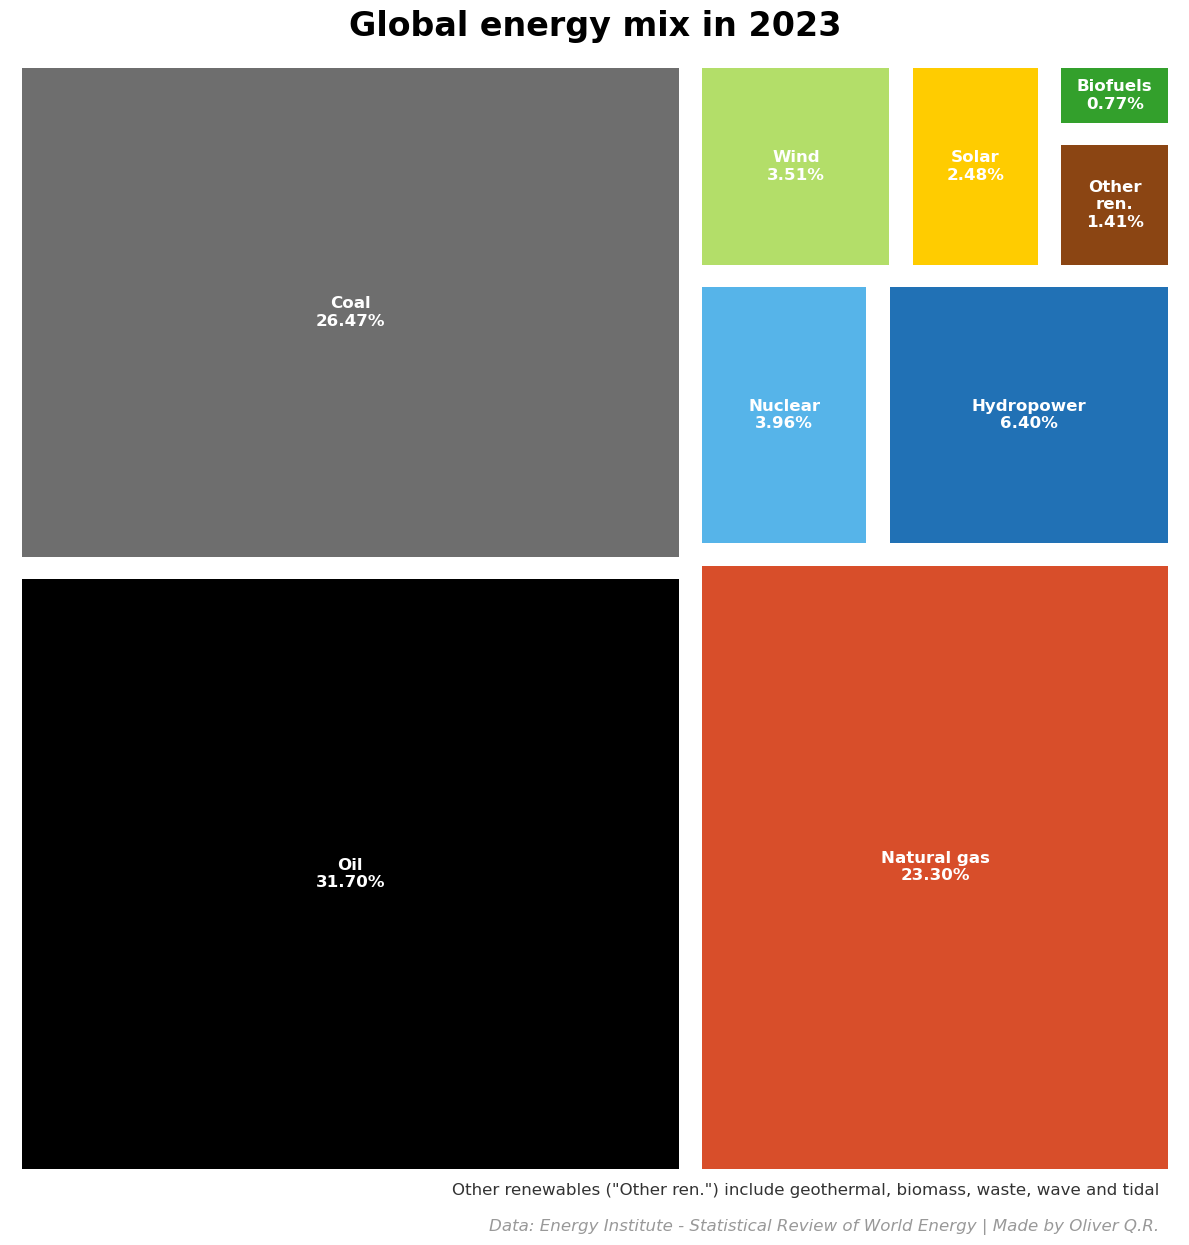

In [85]:
# treemap
plt.figure(figsize=(12, 12))

squarify.plot(
    sizes=last_global_share['share'],
    label=last_global_share['label'],
    color=last_global_share['colour'],
    text_kwargs={'color': 'white', 'fontsize': 12, 'fontweight': 'bold'},
    pad=True
)

plt.title(f"Global energy mix in {last_year}", size=24, fontweight='bold', pad=15)
plt.figtext(0.97, 0, 'Other renewables ("Other ren.") include geothermal, biomass, waste, wave and tidal', ha='right',
           color='#333333', size=12)
plt.figtext(0.97, -0.03, 'Data: Energy Institute - Statistical Review of World Energy | Made by Oliver Q.R.', ha='right',\
           color='#999', size=12, fontstyle='italic')
plt.axis('off')

plt.tight_layout()

#plt.savefig('figures/Fig06_Global energy mix in 2023.png', bbox_inches='tight')

plt.show()

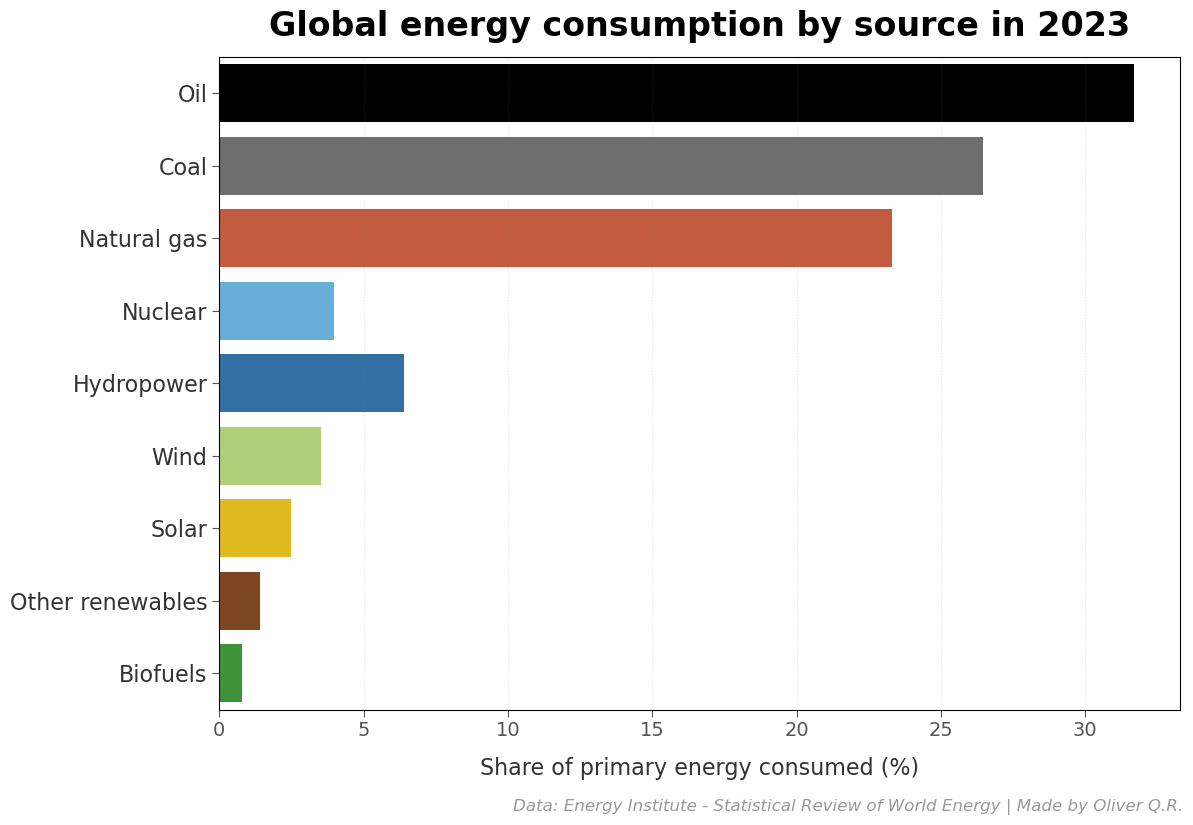

In [86]:
# another way to plot the same
# bar chart
plt.figure(figsize=(12, 8))

sns.barplot(data=last_global_share, x='share', y='source', hue='source', palette=energy_sources_colours, legend=None)

plt.title(f"Global energy consumption by source in {last_year}", size=24, fontweight='bold', pad=15)
plt.xlabel('Share of primary energy consumed (%)', size=16, color='#333', labelpad=12)
plt.ylabel('')
plt.xticks(color='#555', size=14)
plt.yticks(color='#333', size=16)
plt.tick_params(axis='both', color='#555', size=5)

plt.figtext(0.99, -0.02, 'Data: Energy Institute - Statistical Review of World Energy | Made by Oliver Q.R.', ha='right',\
           color='#999', size=12, fontstyle='italic')
plt.grid(True, axis='x', linestyle=':', color='grey', alpha=0.2)
plt.tight_layout()

plt.show()

Most of the primary energy consumed globally in 2023 came from burning fossil fuels (>81%). Oil was the main source (producing 31.7% of the global primary energy consumed), followed by coal (26.47%) and natural gas (23%). Renewables are still far behind (14,7% of the global consumption), with hydropower being the most abundant in this category. Finally, nuclear energy produced 3.96% of the world's primary energy consumed in 2023.

In [88]:
# preparing data to plot the share by energy source and region in 2023
last_share_by_region = energy_df.loc[(energy_df['Country'].isin(regions)) & (energy_df['Year'] == last_year),\
    list(['Country', 'primary_ej'] + energy_sources_cols)].rename(columns=energy_sources_renaming_dict).reset_index(drop=True)

last_share_by_region[energy_sources] = last_share_by_region[energy_sources].mul(100).div(last_share_by_region['primary_ej'], axis=0)

last_share_by_region.drop(labels='primary_ej', axis=1, inplace=True)

last_share_by_region.set_index('Country', inplace=True)

last_share_by_region = last_share_by_region[['Oil', 'Coal', 'Natural gas', 'Nuclear', 'Hydropower', 'Wind', 'Solar', \
                                             'Biofuels', 'Other renewables']]

last_share_by_region

,Oil,Coal,Natural gas,Nuclear,Hydropower,Wind,Solar,Biofuels,Other renewables
Country,,,,,,,,,
Africa,40.692408,19.561433,29.537183,0.382804,7.243310,1.246676,0.860226,0.014377,0.461583
Asia Pacific,25.739657,46.507038,11.541078,2.402196,5.731402,3.349837,2.973505,0.290113,1.465174
CIS,22.495703,13.472295,52.691078,5.108717,5.810110,0.202123,0.137210,0.043194,0.039570
Europe,36.396338,10.783980,21.427994,8.483554,7.672660,7.377486,3.542341,1.118978,3.196669
Middle East,45.193554,0.936980,51.404755,0.863005,0.637484,0.117918,0.829955,0.007261,0.009087
North America,37.749610,7.568661,34.084991,7.056621,4.976325,3.928038,2.206467,1.641083,0.788204
South & Central America,41.599545,3.723761,18.613013,0.673499,22.423798,4.011797,2.468684,3.477138,3.008765


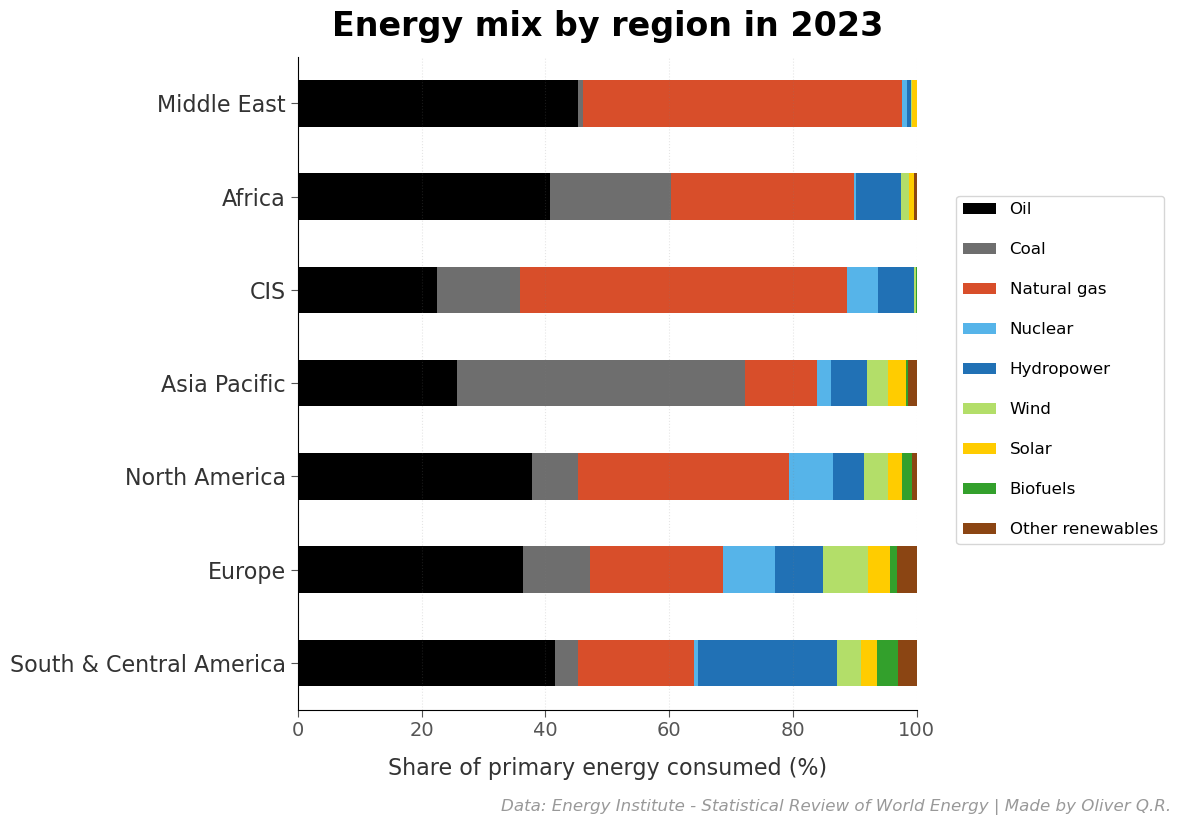

In [89]:
#creating the graph (energy mix by region)
fig, ax = plt.subplots(figsize=(12, 8))

last_share_by_region.reindex(['South & Central America', 'Europe', 'North America', 'Asia Pacific', 'CIS', 'Africa',
                              'Middle East'])\
    .plot(kind='barh', stacked=True, 
          color=[energy_sources_colours[col] for col in last_share_by_region.columns],
          ax=ax)
plt.xlim(0, 100)

ax.legend(loc='upper center')
plt.title(f"Energy mix by region in {last_year}", size=24, fontweight='bold', pad=15)
plt.xlabel('Share of primary energy consumed (%)', size=16, color='#333', labelpad=12)
plt.ylabel('')
plt.xticks(color='#555', size=14)
plt.yticks(color='#333', size=16)
plt.tick_params(axis='both', color='#555', size=5)

plt.legend(loc='upper left', bbox_to_anchor=(1.05, 0.8), ncol=1, frameon=True, fontsize=12,
           labelspacing=1.5, columnspacing=1.5)

plt.figtext(0.98, -0.02, 'Data: Energy Institute - Statistical Review of World Energy | Made by Oliver Q.R.', ha='right',\
           color='#999', size=12, fontstyle='italic')
plt.grid(True, axis='x', linestyle=':', color='grey', alpha=0.2)
sns.despine()
plt.tight_layout()

#plt.savefig('figures/Fig07_Energy mix by region in 2023.png', bbox_inches='tight')

plt.show()

Fossil fuels were the dominant energy source across all regions in 2023, but there are some differences across regions. The Middle East is where fossil fuels produced most of the primary energy consumed in the region (>97%). Natural gas was the main energy source (51.4%), closely followed by oil. This region had also the lowest percentage of renewable sources in its energy mix (~1.5%).<br>
<br>
Africa had the second-largest share of energy produced burning fossil fuels, with oil as the primary source and natural gas the second. In this continent, the proportion of energy produced using renewable sources was the third lowest, with hydropower being the main contributor in this category. Also, nuclear energy was almost non-existent (only 0.38% of total energy consumed).<br>
<br>
The CIS was the region with the third largest proportion of fossil fuels in its energy mix, very close to Africa. In the CIS, natural gas was the main source (providing 52.7% of the energy consumed), followed by oil and coal, whereas the renewables share was the third lowest amongst all the regions.<br>
<br>
Asia Pacific was not far behind in the proportion of the amount of energy consumed produced by burning fossil fuels. In this region, coal was the main energy source, accounting for 46.51% of the energy mix. Oil was second (25.7%) and natural gas third (11.5%). 13.8% of the energy consumed came from renewable sources, placing this region as the third with the largest share of renewables in the energy mix.<br>
<br>
In North America, burning fossil fuels produced 79.4% of the primary energy consumed in 2023, with oil being the largest contributor (37.7%). Renewable sources produced 13.5% of the energy consumed, while nuclear energy accounted for 7.1% in the region's energy mix.<br>
<br>
Europe has the second lowest share of energy consumed produced by burning fossil fuels (68.6%), with oil playing the main role (36.4%). It was also the region with the second largest share of renewables in the energy mix (22.9%, with hydropower and wind as the main sources in this category), and the region with the largest share of nuclear sources in the mix (8.5%).<br>
<br>
Finally, South & Central America stood out with the lowest share of fossil fuels (63.9%). Oil was the primary contributor, accounting for 41.6% of the region's energy mix. This region had the largest share of renewable sources (35.4%), with hydropower playing a significant role, providing 22.4% of the total energy consumed in the region.

In [91]:
# going into the country level
# creating a mapping dictionary
main_energy_types = {'Coal': 'Fossil fuels',
                    'Oil': 'Fossil fuels',
                    'Natural gas': 'Fossil fuels',
                    'Nuclear': 'Nuclear',
                    'Wind': 'Renewable',
                    'Solar': 'Renewable',
                    'Hydropower': 'Renewable',
                    'Biofuels': 'Renewable',
                    'Other renewables': 'Renewable'}

# selecting main energy sources by country and year
main_types_by_country = energy_df.loc[energy_df['aggregate'] == 0, \
    list(['Year', 'Country', 'ISO3166_alpha3', 'primary_ej'] + energy_sources_cols)]\
    .rename(columns=energy_sources_renaming_dict).reset_index(drop=True)

# calculating share
main_types_by_country[energy_sources] = main_types_by_country[energy_sources].mul(100)\
    .div(main_types_by_country['primary_ej'], axis=0)

# removing the primary_ej column
main_types_by_country.drop(labels='primary_ej', axis=1, inplace=True)

# reshaping the dataframe
main_types_by_country = main_types_by_country.melt(id_vars=['Year', 'Country', 'ISO3166_alpha3'], 
                                                   var_name='source', value_name='share')

# creating a new column with the main energy types (renewables, fossil fuels, nuclear)
main_types_by_country['energy_type'] = main_types_by_country['source'].map(main_energy_types)

# calculating the sum of each main energy type per year and country
main_types_by_country = main_types_by_country.groupby(['Year', 'Country', 'ISO3166_alpha3', 'energy_type'], 
                                                      as_index=False)['share'].sum()

# checking the newly created dataframe
main_types_by_country

,Year,Country,ISO3166_alpha3,energy_type,share
0,1965,Algeria,DZA,Fossil fuels,95.236933
1,1965,Algeria,DZA,Nuclear,0.000000
2,1965,Algeria,DZA,Renewable,4.763068
3,1965,Argentina,ARG,Fossil fuels,98.897306
4,1965,Argentina,ARG,Nuclear,0.000000
...,...,...,...,...,...
13195,2023,Venezuela,VEN,Nuclear,0.000000
13196,2023,Venezuela,VEN,Renewable,24.237406
13197,2023,Vietnam,VNM,Fossil fuels,77.245188
13198,2023,Vietnam,VNM,Nuclear,0.000000


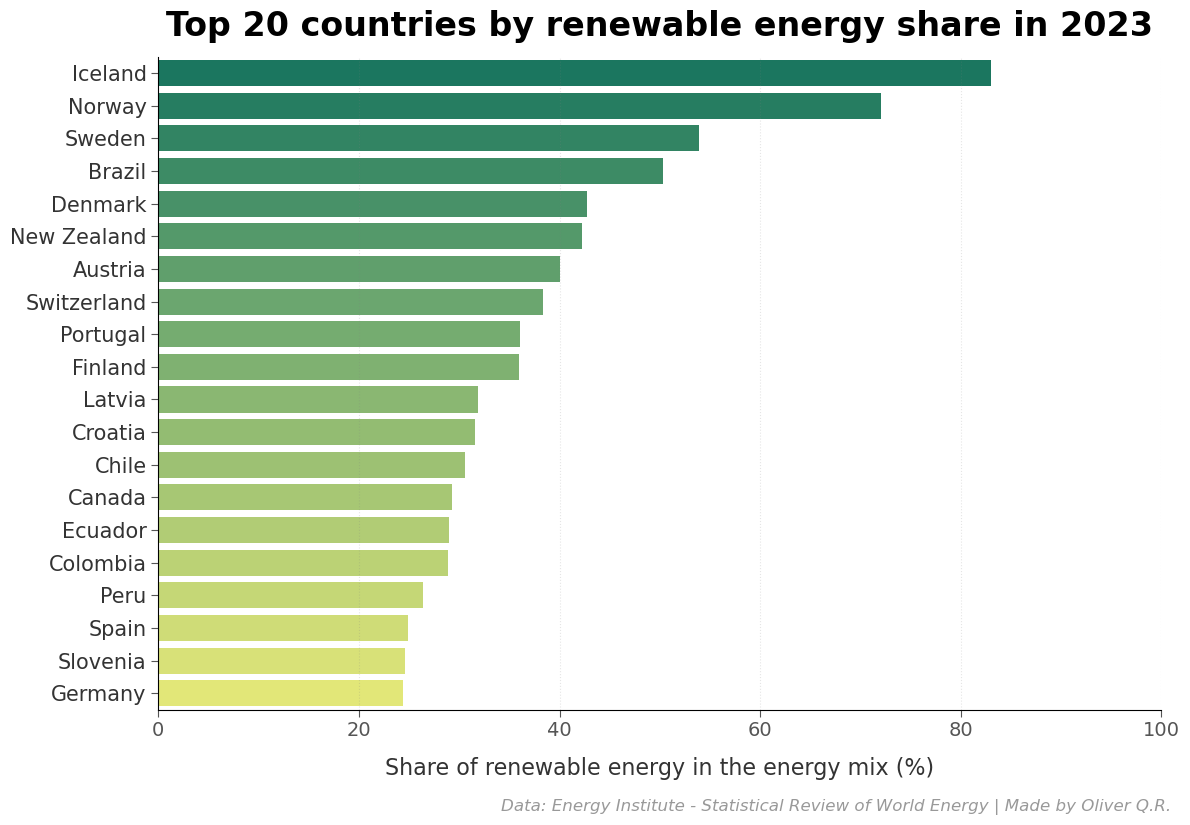

In [92]:
# Top 20 countries with the largest share of renewable energy in 2023
top20_by_ren_share_last = main_types_by_country[main_types_by_country['Year'] == last_year].drop(labels='Year', axis=1)\
    .pivot_table(index='Country', columns='energy_type', values='share').sort_values(by='Renewable', ascending=False)\
    .head(20)

# creating the graph
plt.figure(figsize=(12, 8))

sns.barplot(data=top20_by_ren_share_last, x='Renewable', y=top20_by_ren_share_last.index, 
            hue='Country', palette='summer')

plt.title(f"Top 20 countries by renewable energy share in {last_year}", size=24, fontweight='bold', pad=15)
plt.xlabel('Share of renewable energy in the energy mix (%)', size=16, color='#333', labelpad=12)
plt.ylabel('')
plt.xticks(color='#555', size=14)
plt.yticks(color='#333', size=15)
plt.tick_params(axis='both', color='#555', size=5)
plt.xlim(0, 100)

plt.figtext(0.98, -0.02, 'Data: Energy Institute - Statistical Review of World Energy | Made by Oliver Q.R.', ha='right',\
           color='#999', size=12, fontstyle='italic')
plt.grid(True, axis='x', linestyle=':', color='grey', alpha=0.2)
sns.despine()
plt.tight_layout()

#plt.savefig('figures/Fig08_Top 20 countries by renewables share in 2023.png', bbox_inches='tight')

plt.show()

At the country level, which nations had the largest renewables share in the energy mix in 2023? Iceland and Norway stood out, with 82.97 and 72.09% of their energy consumed coming from renewables, respectively, likely due to the abundance of geothermal and hydropower resources. Sweden and Brazil followed closely, with renewables accounting for the production of half of the energy they consumed (hydropower play a pivotal role in these countries, as well as biomass in Sweden).<br>
<br>
European and South American countries dominate this list, with four Nordic countries ranking at the top (four in the top five). The only non-European and non-South American countries among the top 20 were New Zealand and Canada, likely due to the relative abundance of geothermal (in New Zealand) and hydropower resources.

In [94]:
# plotting renewable share of European countries
european_countries = ['Austria', 'Belgium', 'Bulgaria', 'Cyprus', 'Czech Republic', 'Denmark', 'Finland', 'France',
                     'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Luxembourg', 'Netherlands',
                     'Norway', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Spain', 'Sweden', 'Switzerland', 'Türkiye',
                     'United Kingdom', 'Belarus', 'Estonia', 'Latvia', 'Lithuania', 'Russia', 'Ukraine', 'Croatia',
                     'North Macedonia', 'Slovenia']

# loading the world map (geodataframe)
world = gpd.read_file('ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp')

In [95]:
# cleaning country names in the geodataframe
world[['SOVEREIGNT', 'ADMIN']] = world[['SOVEREIGNT', 'ADMIN']].replace({'Czechia': 'Czech Republic',
                                                   'Turkey': 'Türkiye'})

In [96]:
# selecting renewable share data for European countries in 2023 (last data available)
european_ren_share_last = main_types_by_country.loc[(main_types_by_country['Year'] == last_year) &\
    (main_types_by_country['Country'].isin(european_countries)) \
    & (main_types_by_country['energy_type'] == 'Renewable'), ['Country', 'ISO3166_alpha3', 'share']].reset_index(drop=True)

In [97]:
# merging the geodataframe with the renewable share data in 2023
ren_map = world.merge(european_ren_share_last, how='left', left_on='SOVEREIGNT', right_on='Country')

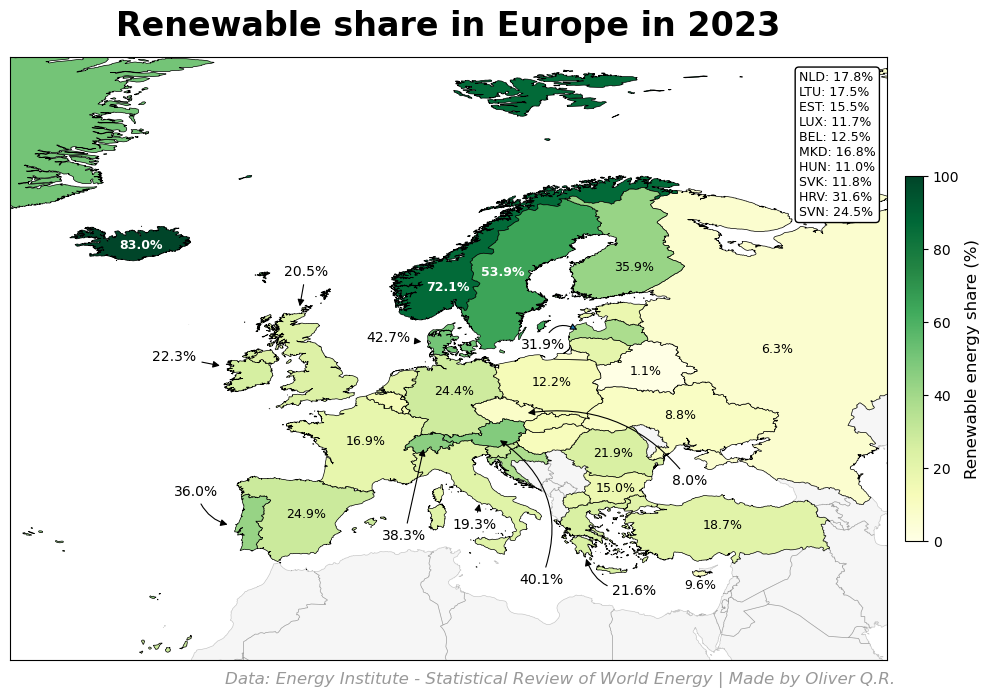

In [98]:
# getting a colour map to create a colour bar
cmap = plt.get_cmap('YlGn')

# creating the graph
fig, ax = plt.subplots(figsize=(10, 14))

ren_map.plot(column='share', 
             cmap=cmap,
             edgecolor='black',
             linewidth=0.5,
             missing_kwds={'color': 'lightgrey', 'alpha': 0.2},
             ax=ax)

# colour bar
sm = cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=100))
cbar = fig.colorbar(sm, ax=ax, orientation='vertical', fraction=0.02, pad=0.02)
cbar.set_label('Renewable energy share (%)', fontsize=12)


ax.set_xlim(-30, 50)
ax.set_ylim(27, 82)
ax.set(xticks=[], yticks=[], xticklabels=[], yticklabels=[])

ax.set_title(f"Renewable share in Europe in {last_year}", size=24, fontweight='bold', pad=15)


# annotations
label_coords = {
    'Portugal': (42, -13),
    'Spain': (40, -3),
    'Italy': (39, 12.4),
    'France': (46.6, 2.5),
    'UK': (54.5, -3.0),
    'Germany': (51.2, 10.5),
    'Poland': (52, 19.4),
    'Sweden': (62, 15),
    'Finland': (62.5, 27),
    'Russia': (55, 40),
    'Belarus': (53, 28),
    'Ukraine': (49, 31.2),
    'Romania': (45.5, 25),
    'Greece': (33, 27),
    'Bulgaria': (42.35, 25.25),
    'Türkiye': (39, 35),
    'Iceland': (64.5, -18),
    'Norway': (60.7, 10),
    'Denmark': (56, 4.5),
    'United Kingdom': (62, -3),
    'Ireland': (54.3, -15),
    'Switzerland': (38, 6),
    'Austria': (34, 18.5),
    'Latvia': (55.4, 16.6),
    'Czech Republic': (43, 32),
    'Cyprus': (33.5, 33)
}

countries_to_annotate = label_coords.keys()

for idx, row in ren_map.iterrows():
    country = row['ADMIN']
    if country in countries_to_annotate:
        lat = label_coords[country][1]
        lon = label_coords[country][0]
        label = f"{ren_map.loc[ren_map['ADMIN'] == country, 'share'].values[0]:.1f}%"
        if row['share'] >= 50:
            label_colour = 'white'
            label_weight = 'bold'
        else:
            label_colour = 'black'
            label_weight='regular'

        # adding labels and connecting lines (if needed)
        if country == 'Portugal':
            ax.annotate(label, xy=(-9.9, 39.3), xytext=(lat, lon), ha='center',
                        arrowprops={'arrowstyle': '-|>',
                                    'linewidth': 0.8, 
                                    'color': 'black', 
                                    'connectionstyle': 'arc3,rad=0.3'})
        elif country == 'Italy':
            ax.annotate(label, xy=(12.9, 41.5), xytext=(lat, lon), ha='center',
                        arrowprops={'arrowstyle': '-|>',
                                   'linewidth': 0.8,
                                   'color': 'black'})
        elif country == 'Denmark':
            ax.annotate(label, xy=(7.8, 56), xytext=(lat, lon), ha='center',
                        arrowprops={'arrowstyle': '-|>',
                                    'linewidth': 0.8, 
                                    'color': 'black'})
        elif country == 'United Kingdom':
            ax.annotate(label, xy=(-3.6, 59), xytext=(lat, lon), ha='center',
                        arrowprops={'arrowstyle': '-|>',
                                    'linewidth': 0.8, 
                                    'color': 'black'})
        elif country == 'Ireland':
            ax.annotate(label, xy=(-10.6, 53.8), xytext=(lat, lon), ha='center',
                        arrowprops={'arrowstyle': '-|>',
                                    'linewidth': 0.8, 
                                    'color': 'black'})
        elif country == 'Switzerland':
            ax.annotate(label, xy=(7.8, 46.5), xytext=(lat, lon), ha='center',
                        arrowprops={'arrowstyle': '-|>',
                                    'linewidth': 0.8, 
                                    'color': 'black'})
        elif country == 'Austria':
            ax.annotate(label, xy=(14.5, 47.2), xytext=(lat, lon), ha='center',
                        arrowprops={'arrowstyle': '-|>',
                                    'linewidth': 0.8, 
                                    'color': 'black',
                                    'connectionstyle': 'arc3,rad=0.4'})
        elif country == 'Latvia':
            ax.annotate(label, xy=(22, 57), xytext=(lat, lon), arrowprops={'arrowstyle': '-|>',
                                                                       'lw': 0.8,
                                                                       'connectionstyle': 'arc3,rad=-0.6'})
        elif country == 'Greece':
            ax.annotate(label, xy=(22.5, 36.5), xytext=(lat, lon), ha='center',
                        arrowprops={'arrowstyle': '-|>',
                                    'linewidth': 0.8, 
                                    'color': 'black',
                                    'connectionstyle': 'arc3,rad=-0.4'})
        elif country == 'Czech Republic':
            ax.annotate(label, xy=(17, 49.5), xytext=(lat, lon), ha='center',
                        arrowprops={'arrowstyle': '-|>',
                                    'linewidth': 0.8, 
                                    'color': 'black',
                                    'connectionstyle': 'arc3,rad=0.3'}) 
        else:
            ax.text(lat, lon, label, ha='center', color=label_colour, fontweight=label_weight, fontsize=9)


# adding the rest of countries
other_countries = []

for country in european_countries:
    if country not in countries_to_annotate:
        other_countries.append(country)

other_countries_dic = {}

for idx, row in ren_map.iterrows():
    if row['Country'] in other_countries:
        country = row['ISO3166_alpha3']
        value = row['share']
        other_countries_dic[country] = value

other_countries_annot = '\n'.join([f"{country}: {value:.1f}%" for country, value in other_countries_dic.items()])

ax.annotate(other_countries_annot, xy=(42, 67.5), fontsize=9,
           bbox={'boxstyle': 'round,pad=0.3',
                 'fc': 'white',
                 'ec': 'black'})


# adding figure caption
plt.figtext(0.9, 0.2675, 'Data: Energy Institute - Statistical Review of World Energy | Made by Oliver Q.R.', ha='right',\
           color='#999', size=12, fontstyle='italic')
plt.tight_layout()

#plt.savefig('figures/Fig09_Renewables share in Europe in 2023.png', bbox_inches='tight')

plt.show()

If we take a closer look at European countries, in general, most still relied on non-renewable energy sources in 2023. The exception to this was the Nordic countries. Iceland (83%), Norway (72.1%) and Sweden (53.9%) led the way with the highest shares of renewable energy in their energy mix. Denmark (42.7%) and Finland (35.9%) also had a significant share, alongside Austria (40.1%), Switzerland (38.3%), and Portugal (36%).<br>
<br>
Among Europe's five largest economies (Germany, United Kingdom, France, Italy, and Spain), Spain had the highest renewable share (24.9%), followed by Germany (24.4%) and United Kingdom (20.5%). France, where 35% of the energy consumed in 2023 came from nuclear sources, had the lowest (16.9%) and Italy the second lowest (19.3%).<br>
<br>
In general, countries with the lowest renewable share in Europe were Eastern European countries, with Belarus at the bottom (1.1%). Russia (6.3%), Czech Republic (8%), Ukraine (8.8%), and Cyprus (9.6%) completed the list of the five European countries with the lowest renewable share in the energy mix in 2023.

## 5. Renewables vs. Fossil fuels vs. Nuclear.

In a world facing the enormous challenge of global warming and climate change, reducing our dependence of fossil fuels and transitioning to cleaner, less polluting energy sources is critical for the future of our planet. As we saw earlier, fossil fuels are by far the main energy source worldwide, likely due to its energy density, cost and availability.<br>
<br>
Renewables, on the other hand, produced less than 15% of the total primary energy we consumed in 2023. Ideally, we should quickly increase the share of energy produced from renewable sources, while gradually reducing our dependence on fossil fuels, to mitigate the negative effect that they have on our environment. Are we actually making that transition? If so, how fast are we doing it? Is there a reason to be optimistic?

In [102]:
global_share.head()

,Year,Coal,Natural gas,Nuclear,Oil,Biofuels,Other renewables,Solar,Wind,Hydropower
0,1965,37.309004,14.537872,0.167129,41.540475,0.020825,0.129030,0.0,0.0,6.295665
1,1966,35.771272,15.019241,0.213640,42.479644,0.020138,0.134994,0.0,0.0,6.361071
2,1967,33.948576,15.553322,0.245416,43.828699,0.019792,0.131515,0.0,0.0,6.272679
3,1968,32.505361,16.009436,0.294287,44.800771,0.019013,0.137384,0.0,0.0,6.233748
4,1969,31.371749,16.449235,0.326457,45.522599,0.018108,0.135116,0.0,0.0,6.176736


In [103]:
# reshaping the dataframe
global_share2 = global_share.melt(id_vars='Year', var_name='source', value_name='share')

# creating a new column that facilitates grouping by main energy types
global_share2['energy_type'] = global_share2['source'].map(main_energy_types)

# checking the newly created dataframe
global_share2

,Year,source,share,energy_type
0,1965,Coal,37.309004,Fossil fuels
1,1966,Coal,35.771272,Fossil fuels
2,1967,Coal,33.948576,Fossil fuels
3,1968,Coal,32.505361,Fossil fuels
4,1969,Coal,31.371749,Fossil fuels
...,...,...,...,...
526,2019,Hydropower,6.847255,Renewable
527,2020,Hydropower,7.261520,Renewable
528,2021,Hydropower,6.771574,Renewable
529,2022,Hydropower,6.681244,Renewable


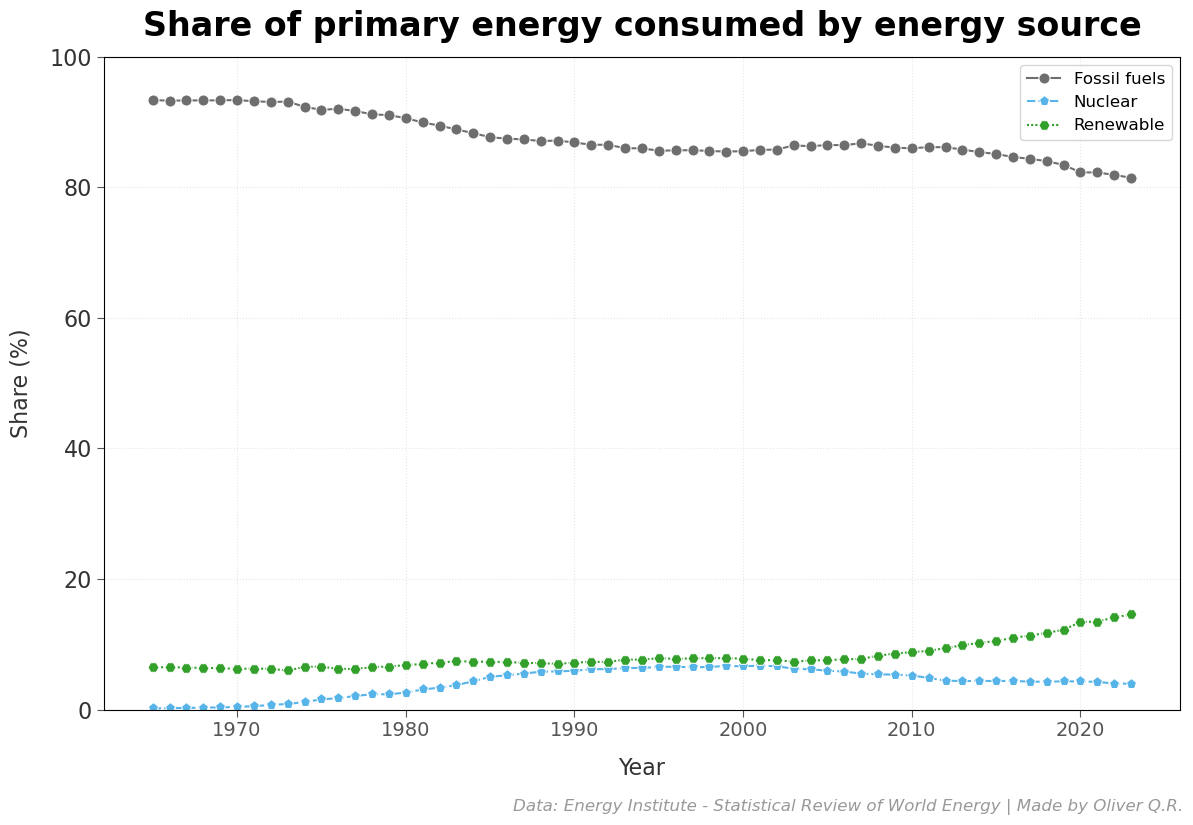

In [104]:
# creating a colour dictionary to use a colour palette
main_types_palette = {'Fossil fuels': '#6e6e6e',
                       'Nuclear': '#56b4e9',
                       'Renewable': '#33a02c'}

# creating a dictionary with markers for the different types
main_types_markers = {'Fossil fuels': 'o',
                       'Nuclear': 'p',
                       'Renewable': 'H'}

# creating the graph
plt.figure(figsize=(12, 8))

sns.lineplot(data=global_share2, x='Year', y='share', hue='energy_type', palette=main_types_palette, style='energy_type',
            estimator='sum', errorbar=None, markers=main_types_markers, markersize=8)

plt.title('Share of primary energy consumed by energy source', size=24, fontweight='bold', pad=15)
plt.xlabel('Year', size=16, color='#333', labelpad=12)
plt.ylabel('Share (%)', size=16, color='#333', labelpad=12)
plt.xticks(color='#555', size=14)
plt.yticks(color='#333', size=16)
plt.tick_params(axis='both', color='#555', size=5)
plt.ylim(0, 100)

plt.legend(title='', title_fontproperties={'size': 14, 'weight': 'bold'}, loc='upper right', ncol=1, 
           prop={'size': 12})

plt.figtext(0.99, -0.02, 'Data: Energy Institute - Statistical Review of World Energy | Made by Oliver Q.R.', ha='right',\
           color='#999', size=12, fontstyle='italic')
plt.grid(True, axis='both', linestyle=':', color='grey', alpha=0.2)
plt.tight_layout()

plt.show()

Let's take a look at the historical evolution of renewables, fossil fuels and nuclear energy consumption over the past few decades. Fossil fuels have remained the dominant energy source globally in the last decades, although their share has been gradually declining. In 1965, around 93.4% of the global primary energy we consumed was produced using fossil fuels, while very little or almost nothing was produced using renewable or nuclear sources (~6.4% and ~0.17, respectively). By 2023, the share of fossil fuels had dropped to 81.5%, and renewable sources made up ~14.6% of the global energy mix.<br>
<br>
The share of renewables in the global energy mix remained relatively stable until the mid-2000s, when significant growth began, going from accounting for 7.3% of the global energy mix in 2003 to 14.6% in 2023. This shift coincided with a gradual decline in the use of fossil fuels.<br>
<br>
The use of nuclear energy saw a modest increase in the 1970s, possibly linked to the 1973 and 1979 oil crisis (it actually coincides with the beginning of the drop in the use of fossil fuels), reaching its peak in the late 1990s to early 2000s. After that, its share began to decline, a trend that aligns with the increasing adoption of renewable energy and growing concerns about the potential dangers of the nuclear energy, such as toxic waste, and bad public image, especially after incidents like those in the Chernobyl's and Fukushima's nuclear power plants.<br>
<br>
As a result, many countries have opted to phase out nuclear powerplants in favour of renewable sources, and this is something we can see in the global trend. Summarising, the use of fossil fuels is gradually declining, along with an increase in renewable energy. This goes in line with policies implemented in many countries to gradually reduce the carbon footprint and transitioning away from the most polluting energy sources. But it looks like we still have a long way to go until renewable sources become the main contributor in our global energy mix.

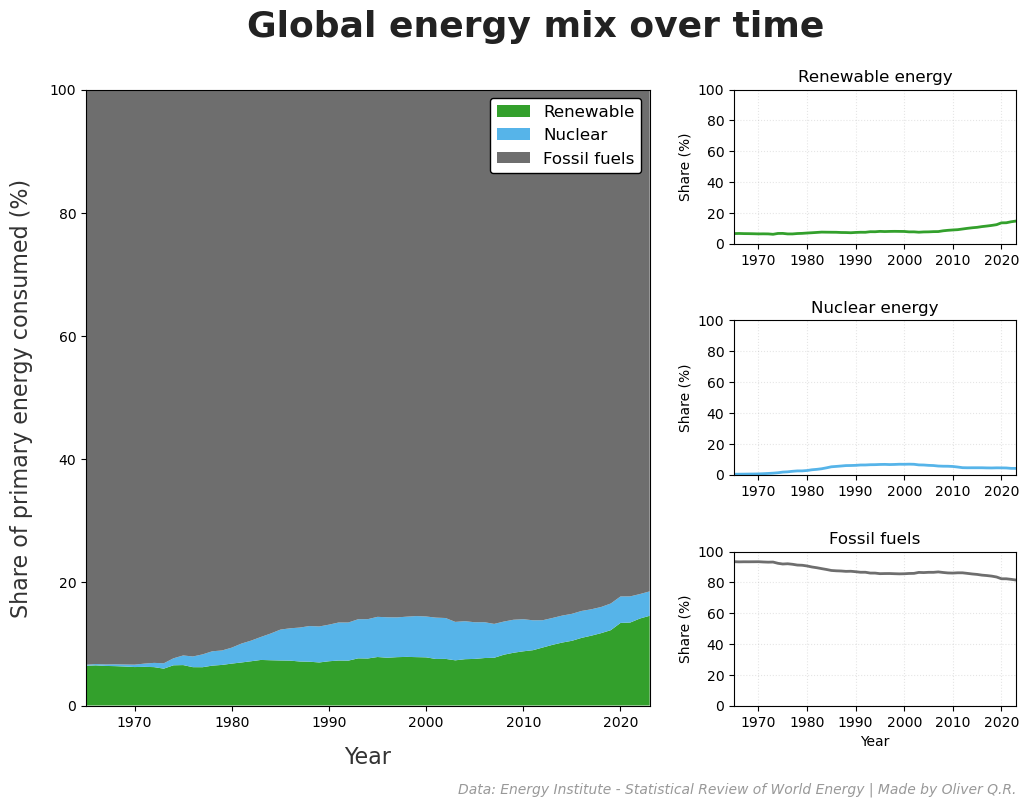

In [106]:
# another way to plot the same
# reshaping the data for simplicity
global_share3 = global_share2.groupby(['Year', 'energy_type'], as_index=False)['share'].sum()\
    .pivot(index='Year', columns='energy_type', values='share')

# importing GridSpec
from matplotlib.gridspec import GridSpec

# defining colours, labels and titles
sources = ['Renewable', 'Nuclear', 'Fossil fuels']
colours = ['#33a02c', '#56b4e9', '#6e6e6e']
titles = ['Renewable energy', 'Nuclear energy', 'Fossil fuels']

# creating the graph
fig = plt.figure(figsize=(12, 8))
gs = GridSpec(3, 2, width_ratios=[2, 1], height_ratios=[1, 1, 1], hspace=0.5)

# area chart with all sources together
ax1 = fig.add_subplot(gs[:, 0])
ax1.stackplot(global_share3.index, [global_share3[source] for source in sources],
             colors=colours, labels=sources)
ax1.legend(loc='upper right', fontsize=12, framealpha=1, edgecolor='black')
#ax1.set_title('Energy mix', size=18, color='#333', pad=12)
ax1.set_xlim(1965, 2023)
ax1.set_ylim(0, 100)
ax1.set_xlabel('Year', size=16, color='#333', labelpad=12)
ax1.set_ylabel('Share of primary energy consumed (%)', size=16, color='#333', labelpad=12)

# plotting individual energy sources
for i, (source, colour, title) in enumerate(zip(sources, colours, titles)):
    ax = fig.add_subplot(gs[i, 1])
    sns.lineplot(data=global_share3, x='Year', y=source, color=colour, linewidth=2, ax=ax)
    ax.set(xlim=(1965, 2023), ylim=(0, 100), ylabel='Share (%)')
    ax.set_title(title)
    ax.grid(True, linestyle=':', color='grey', alpha=0.2)

    if i < 2:
        ax.set_xlabel('')
    else:
        ax.set_xlabel('Year')

plt.suptitle('Global energy mix over time', size=26, color='#222', fontweight='bold')
plt.figtext(0.90, 0, 'Data: Energy Institute - Statistical Review of World Energy | Made by Oliver Q.R.', ha='right',\
           color='#999', size=10, fontstyle='italic')

#plt.savefig('figures/Fig10_Global energy mix over time.png', bbox_inches='tight')

plt.show()

## 6. CO<sub>2</sub> emissions.

Most of the energy we consume comes from burning fossil fuels, which release CO<sub>2</sub> to the atmosphere. This has a tremendous environmental impact, as CO<sub>2</sub> emissions are one of the major drivers of global warming and climate change. Thus, it is crucial to track how much CO<sub>2</sub> is being emitted and understand how these emissions have evolved over time alongside energy consumption trends.

### 6.1. Global CO<sub>2</sub> emissions over time.

We are consuming more energy than ever before. Are we also emitting more carbon dioxide than ever before despite knowing its negative impact on global warming? To find out, let's have a look at global CO<sub>2</sub> emissions over time.

In [111]:
# selecting global CO2 emissions (total and per capita) columns
global_co2 = energy_df.loc[energy_df['Country'] == 'World', ['Year', 'co2_mtco2', 'co2_em_pc']]

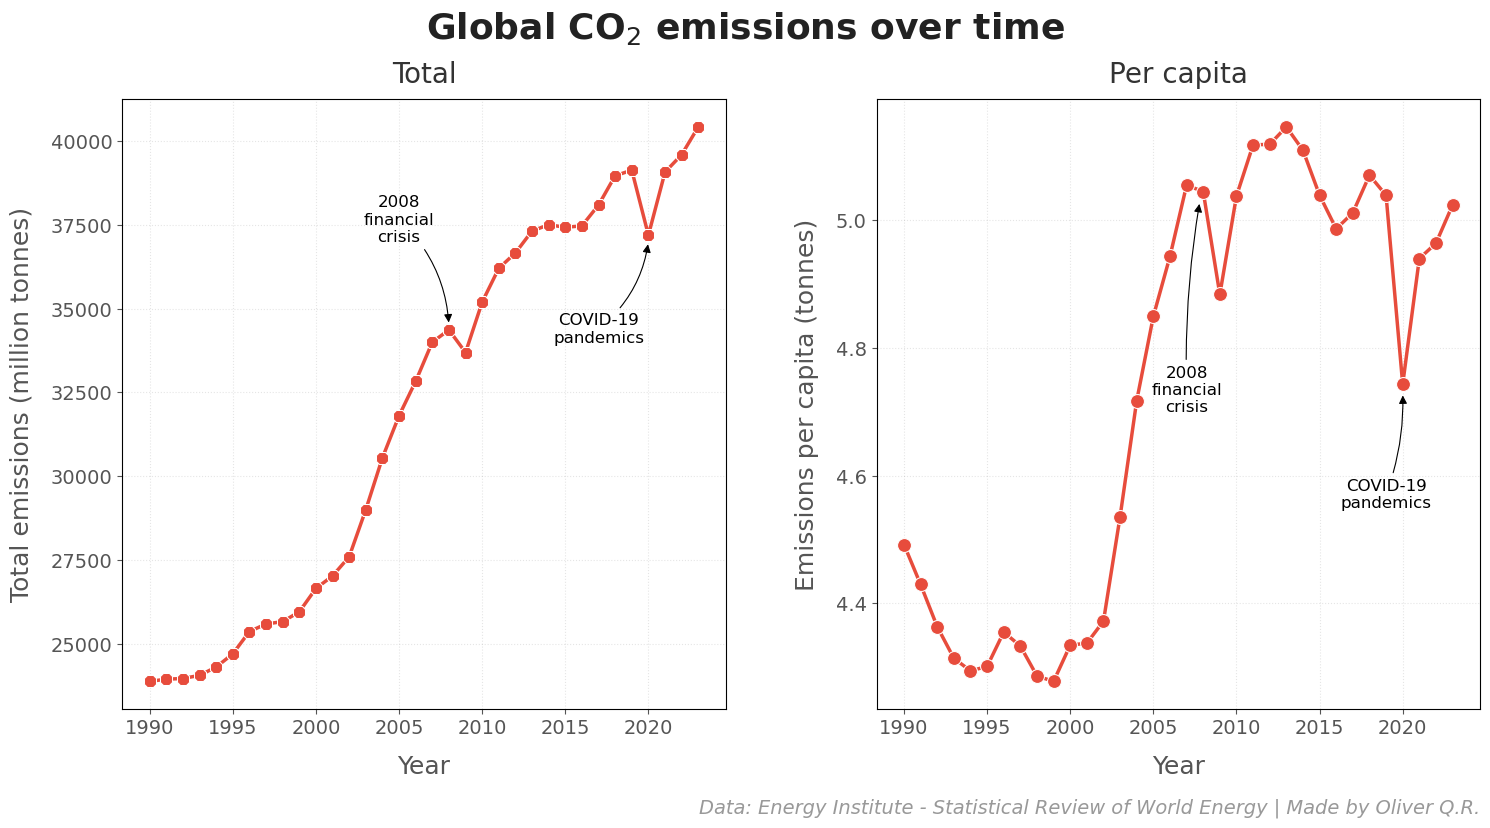

In [112]:
# creating the graph
fig, ax = plt.subplots(1, 2, figsize=(15, 8))

# global total CO2 emitted
sns.lineplot(data=global_co2, x='Year', y='co2_mtco2', color='#e74c3c', linewidth=2.5, marker='8', markersize=10,
            ax=ax[0])
ax[0].set_title('Total', size=20, color='#333', pad=12)
ax[0].set_ylabel('Total emissions (million tonnes)', color='#555', size=18, labelpad=12)
ax[0].set_xlabel('Year', color='#555', size=18, labelpad=12)
ax[0].grid(True, linestyle=':', color='grey', alpha=0.2)

# annotations
ax[0].annotate('2008\nfinancial\ncrisis', xy=(2008, 34500), xytext=(2005, 37000), ha='center', fontsize=12,
               arrowprops={'arrowstyle': '-|>', 
                           'linewidth': 0.8,
                           'color': 'black',
                           'connectionstyle': 'arc3,rad=-0.2'})

ax[0].annotate('COVID-19\npandemics', xy=(2020, 37000), xytext=(2017, 34000), ha='center', fontsize=12,
               arrowprops={'arrowstyle': '-|>', 
                           'linewidth': 0.8,
                           'color': 'black',
                           'connectionstyle': 'arc3,rad=0.2'})



# global CO2 emitted per capita
sns.lineplot(data=global_co2, x='Year', y='co2_em_pc', color='#e74c3c', linewidth=2.5, marker='o', markersize=10,
            ax=ax[1])
ax[1].set_title('Per capita', size=20, color='#333', pad=12)
ax[1].set_xlabel('Year', size=18, color='#555', labelpad=12)
ax[1].set_ylabel('Emissions per capita (tonnes)', size=18, color='#555', labelpad=12)
ax[1].grid(True, linestyle=':', color='grey', alpha=0.2)

# annotations
ax[1].annotate('2008\nfinancial\ncrisis', xy=(2007.8, 5.03), xytext=(2007, 4.7), ha='center', fontsize=12,
               arrowprops={'arrowstyle': '-|>', 
                           'linewidth': 0.8,
                           'color': 'black',
                           'connectionstyle': 'arc3,rad=-0.05'})

ax[1].annotate('COVID-19\npandemics', xy=(2020, 4.73), xytext=(2019, 4.55), ha='center', fontsize=12,
               arrowprops={'arrowstyle': '-|>', 
                           'linewidth': 0.8,
                           'color': 'black',
                           'connectionstyle': 'arc3,rad=0.1'})


for axis in ax:
    axis.tick_params(axis='both', which='major', colors='#555', labelsize=14)

plt.suptitle(r"Global CO$_2$ emissions over time", size=26, color='#222', fontweight='bold')
plt.figtext(0.99, -0.025, 'Data: Energy Institute - Statistical Review of World Energy | Made by Oliver Q.R.', ha='right',\
           color='#999', size=14, fontstyle='italic')
plt.tight_layout()
plt.subplots_adjust(wspace=0.25)

#plt.savefig('figures/Fig11_Global CO2 emissions over time.png', bbox_inches='tight')

plt.show()

Global CO<sub>2</sub> emissions have been rising steadily over the last 35 years, with the only exceptions of 2009 (financial crisis) and 2020 (COVID-19 pandemics). In fact, CO<sub>2</sub> emissions in 2023 reached their highest level in recorded history. With the current trend, it's easy to imagine that 2024 saw higher emissions than 2023, and that they will continue increasing in the coming years.<br>
<br>
On the other hand, emissions per capita have followed a somewhat different evolution. In the early 1990s, there was a brief decline in emissions per capita (probably the collapse of the USSR had something to do with this), but, in the 2000s, there was a sharp increase until 2007.<br>
<br>
The 2008 financial crisis caused a temporary drop in the CO<sub>2</sub> emitted per capita (and total as well), followed by a quick increase until reaching a peak in 2013. After this year, there was another mild drop and then a modest increase until 2018. In 2020, the COVID-19 pandemics hit the world and caused the CO<sub>2</sub> emissions per capita to significantly drop. From this point, the emissions per capita increased stadily again, reaching levels in 2023 close to those in 2007-8.<br>
<br>
With ups and downs in the last 17 years or so, CO<sub>2</sub> emissions per capita haven't significantly increased in this period. However, the upwarding trend is still there, and it wouldn't be surprising if we see higher CO<sub>2</sub> emissions per capita in the coming years than when it peaked back in 2007.

### 6.2. Top CO<sub>2</sub> emitters.

In [115]:
# selecting data by region
co2_em_region = energy_df.loc[energy_df['Country'].isin(regions), ['Year', 'Country', 'co2_mtco2', 'co2_em_pc']]\
    .rename(columns={'Country': 'region'}).reset_index(drop=True)

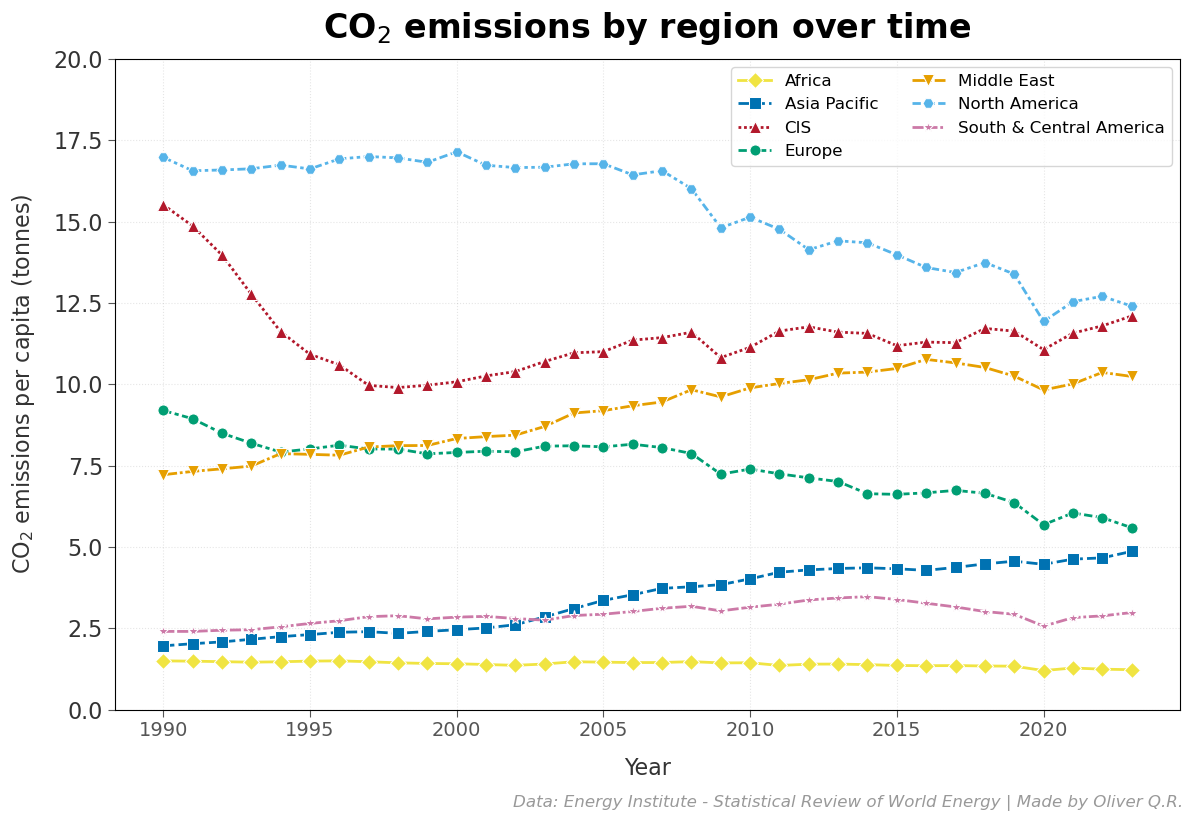

In [116]:
# creating a graph to plot the evolution of the CO2 emissions per capita by region
plt.figure(figsize=(12, 8))

sns.lineplot(data=co2_em_region, x='Year', y='co2_em_pc', hue='region', palette=region_colours, 
             style='region', markers=region_markers, linewidth=2, markersize=8)

plt.title(r'CO$_2$ emissions by region over time', size=24, fontweight='bold', pad=15)
plt.xlabel('Year', size=16, color='#333', labelpad=12)
plt.ylabel(r'CO$_2$ emissions per capita (tonnes)', size=16, color='#333', labelpad=12)
plt.xticks(color='#555', size=14)
plt.yticks(color='#333', size=16)
plt.tick_params(axis='both', color='#555', size=5)
plt.ylim(0, 20)

plt.legend(loc='upper right', ncol=2, prop={'size': 12})

plt.figtext(0.99, -0.015, 'Data: Energy Institute - Statistical Review of World Energy | Made by Oliver Q.R.', ha='right',\
           color='#999', size=12, fontstyle='italic')
plt.grid(True, linestyle=':', color='grey', alpha=0.2)
plt.tight_layout()

#plt.savefig('figures/Fig12_CO2 emissions by region over time.png', bbox_inches='tight')

plt.show()

At a regional level, North America was the region with the highest CO<sub>2</sub> emissions per capita in 2023, closely followed by the CIS. After a period of stable emissions per capita (1990-2007), North America's emissions have been steadily and slowly declining since the late 2000s, which aligns with a drop in the primary energy consumed per capita seen earlier.<br>
<br>
The CIS had almost the same levels of CO<sub>2</sub> emissions per capita as North America in 2023, making it the second-highest emitting region. Looking at the historical evolution, there was a significant drop in emissions following the collapse of the USSR, reaching its lowest point in the late 1990s. Since then, emissions in this region have been on an upwarding trend, and, if this continues, it wouldn't be surprising if already in 2024 surpassed North America as the region with the highest CO<sub>2</sub> emissions per capita.<br>
<br>
The Middle East was the third region with more emissions per capita in 2023, showing a steady increase from 1990 until 2016, at which point it almost surpassed the CIS. After this, there was a very mild decrease, followed by another slight increase.<br>
<br>
The fourth region with more CO<sub>2</sub> emissions per capita in 2023 was Europe. The data shows a mild decrease in the early 1990s, followed by a stable period until the 2008 financial crisis. Since then, Europe has seen a steady decline, reaching in 2023 its lowest CO<sub>2</sub> emissions per capita levels in the dataset.<br>
<br>
Asia Pacific's emissions were not far from Europe's in 2023. This region surpassed South & Central America in the early 2000s, and has shown a steady increase ever since. If the trend continues, Asia Pacific will likely emit more CO<sub>2</sub> per capita than Europe in the near future.<br>
<br>
Finally, South & Central America and Africa have seen little or almost no change in CO<sub>2</sub> emissions per capita over the last 35 years. South & Central America's emissions have increased very modestly in the period from 1990 to 2023, whereas Africa, the region with the lowest emissions per capita, has seen no significant change.

In [118]:
# selecting countries
co2_em_country = energy_df.loc[energy_df['aggregate'] == 0, ['Year', 'Country', 'ISO3166_alpha3', 'co2_mtco2', 'co2_em_pc']]\
    .dropna().reset_index(drop=True)

In [119]:
co2_em_country_last = co2_em_country.loc[co2_em_country['Year'] == last_year, ['Country', 'ISO3166_alpha3', 'co2_em_pc']]\
    .sort_values(by='co2_em_pc', ascending=False)\
    .reset_index(drop=True)

In [120]:
co2_em_country_last

,Country,ISO3166_alpha3,co2_em_pc
0,Qatar,QAT,60.463063
1,United Arab Emirates,ARE,35.809262
2,Turkmenistan,TKM,34.100642
3,Kuwait,KWT,29.176985
4,Oman,OMN,23.683151
...,...,...,...
65,Peru,PER,2.014301
66,Morocco,MAR,1.966078
67,Philippines,PHL,1.397660
68,Pakistan,PAK,0.923030


In [121]:
# top 20 emitters per capita in 2023
top20_emitters_last = co2_em_country_last.head(20)

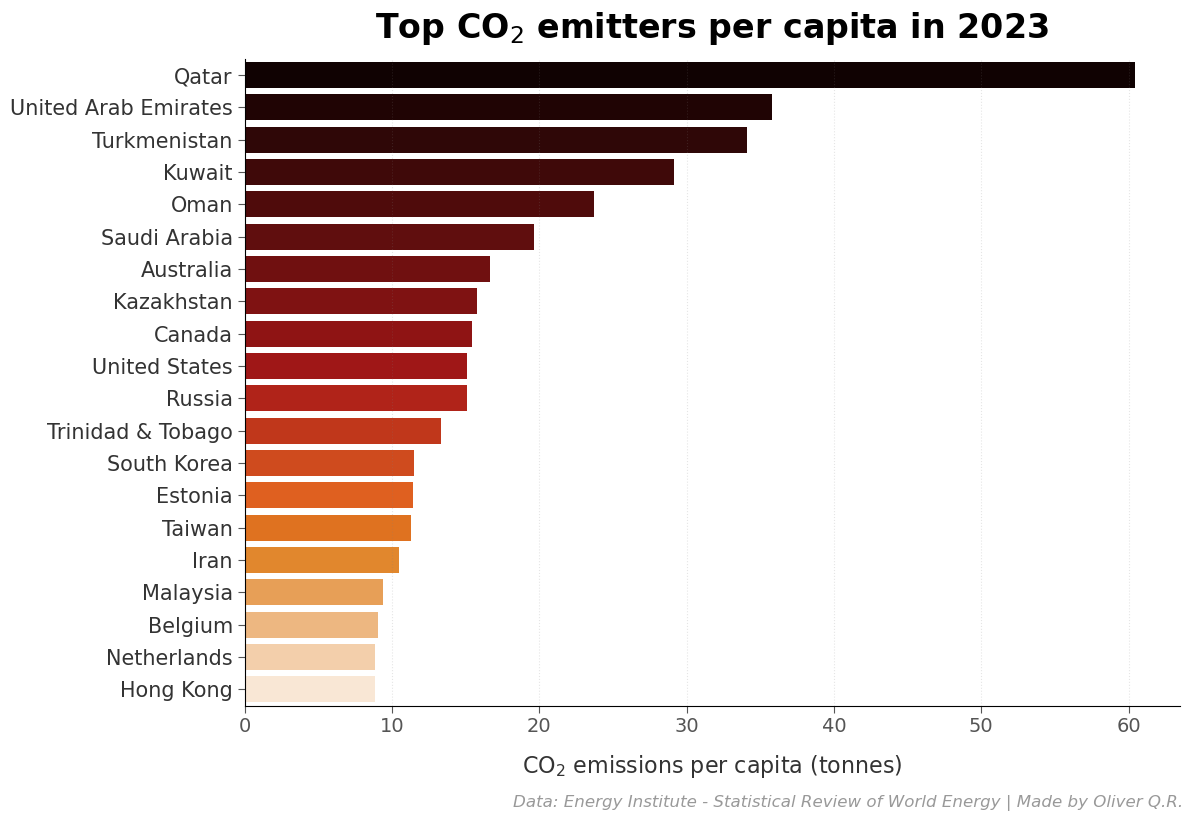

In [122]:
# plotting top 20 countries by CO2 emission per capita in 2023
plt.figure(figsize=(12, 8))

sns.barplot(data=top20_emitters_last, x='co2_em_pc', y='Country', 
            hue='Country', palette='gist_heat')

plt.title(rf"Top CO$_2$ emitters per capita in {last_year}", size=24, fontweight='bold', pad=15)
plt.xlabel(r'CO$_2$ emissions per capita (tonnes)', size=16, color='#333', labelpad=12)
plt.ylabel('')
plt.xticks(color='#555', size=14)
plt.yticks(color='#333', size=15)
plt.tick_params(axis='both', color='#555', size=5)

plt.figtext(0.99, -0.015, 'Data: Energy Institute - Statistical Review of World Energy | Made by Oliver Q.R.', ha='right',\
           color='#999', size=12, fontstyle='italic')
plt.grid(True, axis='x', linestyle=':', color='grey', alpha=0.2)
sns.despine()
plt.tight_layout()

#plt.savefig('figures/Fig13_Top CO2 emitters per capita in 2023.png', bbox_inches='tight')

plt.show()

Going down to the country level, in 2023, nations with economies largely dependent on fossil fuels were, unsurprisingly, the countries with the largest CO<sub>2</sub> emissions per capita. Qatar topped the list (Qatar was also the country with the largest primary energy consumed in 2023), with a significant gap to the second.<br>
<br>
Following Qatar, United Arab Emirates, Turkmenistan, Kuwait and Oman complete the top 5. All of these are countries with strong fossil fuel industries, mainly oil and natural gas. Within the top 10 we can also find Australia, Canada and the USA, which are big countries, with large economies and strong fossil fuel/mining industry.<br>
<br>
The first European countries on this list are Russia, which is also a big country, one of the largest economies in the world, and with a strong fossil fuel industry, ranking 11<sup>th</sup>; and Estonia, one of the largest oil shale producers in the world, ranking 14<sup>th</sup>.

### 6.3. CO<sub>2</sub> emissions vs. primary energy consumption per capita & renewable energy share.

In [125]:
# merging CO2 emissions per capita and primary energy consumption per capita by country (2023)
co2_em_primary_by_country_last = co2_em_country_last.merge(energy_df.loc[(energy_df['Year'] == last_year) & \
                                                           (energy_df['aggregate'] == 0), \
                                                           ['Country', 'primary_ej_pc']], on='Country', how='left')

In [126]:
co2_em_primary_by_country_last

,Country,ISO3166_alpha3,co2_em_pc,primary_ej_pc
0,Qatar,QAT,60.463063,816.654013
1,United Arab Emirates,ARE,35.809262,539.389178
2,Turkmenistan,TKM,34.100642,245.825744
3,Kuwait,KWT,29.176985,365.931829
4,Oman,OMN,23.683151,333.379159
...,...,...,...,...
65,Peru,PER,2.014301,36.031054
66,Morocco,MAR,1.966078,25.808948
67,Philippines,PHL,1.397660,18.691137
68,Pakistan,PAK,0.923030,14.022148


In [127]:
# merging with the share of main energy sources (after reshaping)
co2_prim_en_share_by_country_last = co2_em_primary_by_country_last\
    .merge(main_types_by_country.loc[main_types_by_country['Year'] == last_year, \
                                     ['Country', 'energy_type', 'share']].\
    pivot_table(index='Country', columns='energy_type', values='share')\
    .reset_index(), how='left', on='Country')

In [128]:
co2_prim_en_share_by_country_last

,Country,ISO3166_alpha3,co2_em_pc,primary_ej_pc,Fossil fuels,Nuclear,Renewable
0,Qatar,QAT,60.463063,816.654013,99.373775,0.000000,0.626225
1,United Arab Emirates,ARE,35.809262,539.389178,91.836129,5.641995,2.521876
2,Turkmenistan,TKM,34.100642,245.825744,99.994098,0.000000,0.005902
3,Kuwait,KWT,29.176985,365.931829,99.902582,0.000000,0.097418
4,Oman,OMN,23.683151,333.379159,99.036304,0.000000,0.963696
...,...,...,...,...,...,...,...
65,Peru,PER,2.014301,36.031054,73.650500,0.000000,26.349500
66,Morocco,MAR,1.966078,25.808948,91.555226,0.000000,8.444774
67,Philippines,PHL,1.397660,18.691137,88.008784,0.000000,11.991216
68,Pakistan,PAK,0.923030,14.022148,81.888289,5.953695,12.158016


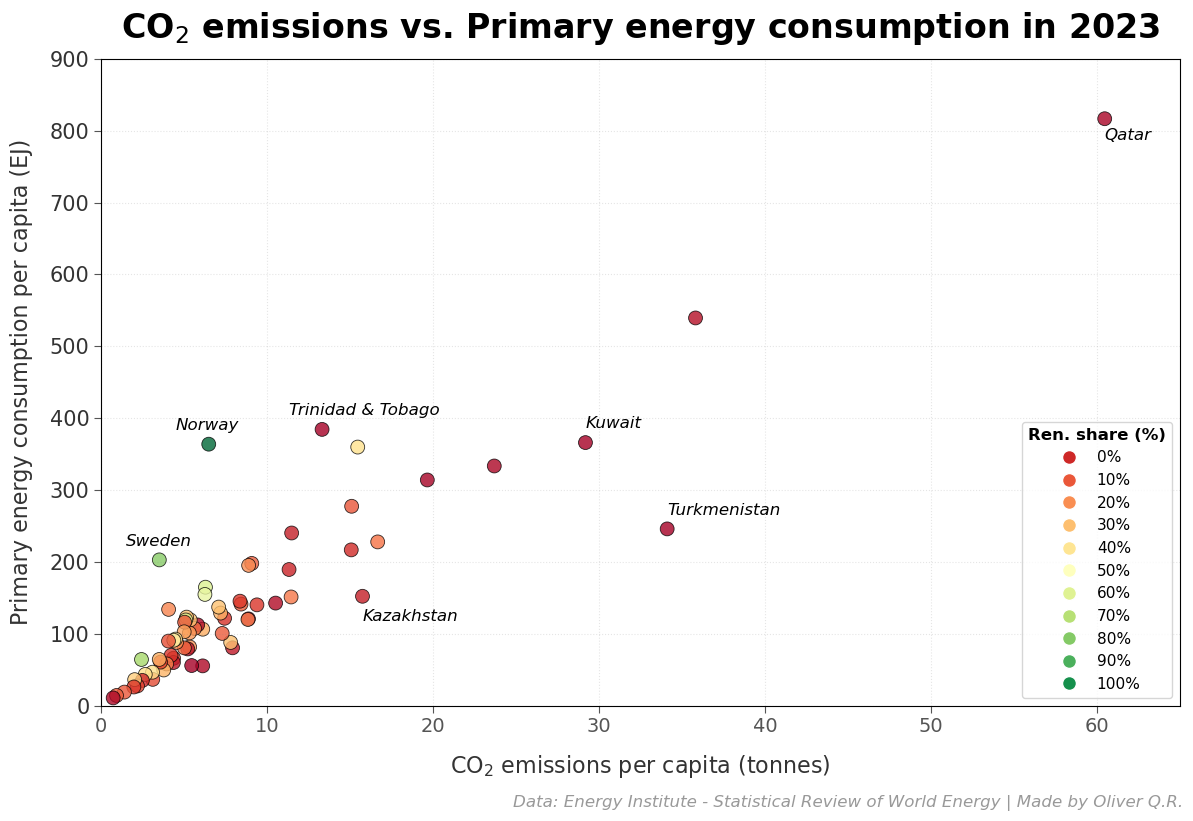

In [129]:
# creating the graph
plt.figure(figsize=(12, 8))

sns.scatterplot(data=co2_prim_en_share_by_country_last, 
                x='co2_em_pc', y='primary_ej_pc', hue='Renewable', marker='o', s=100, 
                palette='RdYlGn', edgecolor='black', linewidth=0.6, alpha=0.8)

plt.title(rf"CO$_2$ emissions vs. Primary energy consumption in {last_year}", size=24, fontweight='bold', pad=15)
plt.xlabel(r'CO$_2$ emissions per capita (tonnes)', size=16, color='#333', labelpad=12)
plt.ylabel('Primary energy consumption per capita (EJ)', size=16, color='#333', labelpad=12)
plt.xlim(0, 65)
plt.ylim(0, 900)
plt.xticks(color='#555', size=14)
plt.yticks(color='#333', size=15)
plt.tick_params(axis='both', color='#555', size=5)

# creating the breaks for the Renewable energy share
from matplotlib.lines import Line2D

breaks = np.arange(0, 101, 10)

legend_handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=sns.color_palette('RdYlGn', 11)[i], 
           markersize=10, label=f"{b}%") for i, b in enumerate(breaks)]

# plotting the legend
plt.legend(loc='lower right', 
           handles=legend_handles,
           title='Ren. share (%)',
           title_fontproperties={'size': 12, 'weight': 'bold'},
           prop={'size': 11})

# selecting specific points for labelling
co2_max = co2_prim_en_share_by_country_last.loc[co2_prim_en_share_by_country_last['co2_em_pc'].idxmax()]
plt.text(co2_max['co2_em_pc'], co2_max['primary_ej_pc'] - 30, co2_max['Country'],
         fontsize=12, style='italic')

ren_high = co2_prim_en_share_by_country_last.loc[(co2_prim_en_share_by_country_last['co2_em_pc'] < 8) & \
    (co2_prim_en_share_by_country_last['primary_ej_pc'] > 200), ['Country', 'co2_em_pc', 'primary_ej_pc']]
for _, row in ren_high.iterrows():
    plt.text(row['co2_em_pc'] - 2, row['primary_ej_pc'] + 20, row['Country'],
             fontsize=12, style='italic')

co2_low_high_cons = co2_prim_en_share_by_country_last.loc[(co2_prim_en_share_by_country_last['co2_em_pc'] > 28) &\
    (co2_prim_en_share_by_country_last['primary_ej_pc'] < 400), ['Country', 'co2_em_pc', 'primary_ej_pc']]
for _, row in co2_low_high_cons.iterrows():
    plt.text(row['co2_em_pc'], row['primary_ej_pc'] + 20, row['Country'],
             fontsize=12, style='italic')

co2_low_high_cons_low_ren = co2_prim_en_share_by_country_last.loc[(co2_prim_en_share_by_country_last['co2_em_pc'] < 15) &\
    (co2_prim_en_share_by_country_last['primary_ej_pc'] > 380), ['Country', 'co2_em_pc', 'primary_ej_pc']]
for _, row in co2_low_high_cons_low_ren.iterrows():
    plt.text(row['co2_em_pc'] - 2, row['primary_ej_pc'] + 20, row['Country'],
             fontsize=12, style='italic')

low_cons_high_co2 = co2_prim_en_share_by_country_last.loc[(co2_prim_en_share_by_country_last['co2_em_pc'] > 15) &\
    (co2_prim_en_share_by_country_last['primary_ej_pc'] < 200), ['Country', 'co2_em_pc', 'primary_ej_pc']]
for _, row in low_cons_high_co2.iterrows():
    plt.text(row['co2_em_pc'], row['primary_ej_pc'] - 35, row['Country'],
             fontsize=12, style='italic')



plt.figtext(0.99, -0.015, 'Data: Energy Institute - Statistical Review of World Energy | Made by Oliver Q.R.', ha='right',\
           color='#999', size=12, fontstyle='italic')
plt.grid(True, linestyle=':', color='grey', alpha=0.2)

plt.tight_layout()

#plt.savefig('figures/Fig14_CO2 emissions vs. Primary energy cons in 2023.png', bbox_inches='tight')

plt.show()

In general, there seems to be a trend where high primary energy consumption per capita correlates with higher CO<sub>2</sub> emissions per capita. However, this correlation is not absolute. Some countries, like Norway, have relatively low CO<sub>2</sub> emissions per capita despite high energy consumption. This is likely because a significant part of the energy consumed comes from renewable sources. Another example is Sweden, with significantly lower emissions than other countries with similar consumption, and with an extensive use of renewable energy.<br>
<br>
In general, countries with a significant share of renewables in their energy mix tend to have lower emissions per capita than those with similar consumption and little or no use of renewables. However, there are also exceptions to this. For instance, Trinidad & Tobago has lower CO<sub>2</sub> emissions per capita than countries with similar primary consumption per capita (for example, Kuwait's consumption is similar to Trinidad & Tobago, but emits more than twice as much CO<sub>2</sub> per capita).<br>
<br>
On the other hand, Turkmenistan and Kazakhstan are also exceptions to the general trend. These countries, with economies largely reliant on fossil fuel production, have higher CO<sub>2</sub> emissions than countries with similar primary energy consumption per capita.<br>
<br>
In summary, broadly speaking, the carbon's footprint of a country comes determined not only by the amount of primary energy consumed, but also the energy mix plays a crucial role.

## 7. Wrapping up.

The world is consuming more energy than ever before, both in term of total global consumption and per capita, with a significant increase over the last few decades. This is likely driven by different factors like growing population, industrial expansion (with special focus on emerging economies), growing international trade, technological advancements, etc.<br>
<br>
Looking at a regional level, North America has been the region with the highest consumption per capita over the last few decades, although its consumption has been on a slight downward trend over the last 20 years. The CIS ranked second in 2023, the Middle East third while, at the other end, Africa was the region with the lowest consumption per capita.<br>
<br>
At country level, nations with strong fossil fuel industries or cold climates that require extensive energy for heating dominate the list of top consumers. However, this is not always the case. Qatar topped the list in 2023, followed by Iceland and Singapore. While Qatar's high energy consumption is largely due to its strong fossil fuel industry, and Iceland's high consumption could be related to a very cold climate, Singapore's highly consumption is likely due to its strong financial sector.<br>
<br>
Fossil fuels continue to be the main source in our energy mix (accounting for over 80% of primary consumption), despite the growing awareness of their negative environmental impact. In 2023, most of the energy consumed globally came from oil (31.7%), followed by coal (26.5%), while less than 15% came from renewable sources.<br>
<br>
If we look at a regional level, there are some differences across the globe. While fossil fuels remained as the main source for all regions in 2023, their share in the energy mix varies. The Middle East relies the most on fossil fuels (>97% of its energy comes from these), whereas South & Central America is where fossil fuels had the lowest share (63.9%).<br>
<br>
Renewable energy use also shows significant disparities across regions. While it's almost non-existent in the Middle East, it's becoming increasingly important in regions like South & Central America (35.4% of the energy consumed in 2023 came from renewable sources) and Europe (where renewables accounted for 22.9% of the energy mix). Among the countries with the largest share of renewables in their energy mix in 2023, Nordic countries dominate, with four of these nations appearing in the top 5 (all five Nordic countries appear in the top 10).<br>
<br>
While the share of renewables in the energy mix has grown, along with a decline in the use of fossil fuels, over the last couple of decades, it's still very far from reaching the levels of fossil fuels (14.6% vs. 81.5% of the global energy mix in 2023). Thus, it seems that we have started a transition towards renewable energy, but the pace is far too slow and a shift is not likely to happen in the near or mid-term future.<br>
<br>
This reliance on fossil fuels has a significant toll on our environment. Thus, CO<sub>2</sub> emissions keep rising, and the trend of the last few decades suggests that we are still far from curbing emissions. Unsurprisingly, there appears to be a correlation between energy consumption per capita and CO<sub>2</sub> emissions, with higher consumption leading to higher emissions. Additionally, countries with a higher share of renewables in their energy mix generally tend to have lower emissions.<br>
<br>
In a world with a growing population and fast technological advancements that demand ever-increasing energy, transitioning towards cleaner and more efficient energy sources is crucial for ensuring a sustainable future for our planet. While this transition seems to have started, its pace is still too slow, and the shift from fossil fuels to renewables seems to be very distant in time.<br>
<br>
In light of the discoveries and forecasts from climate scientists, it's vital to accelerate the implementation of policies aimed at phasing out fossil fuels quickly, transitioning to renewable energy sources, and reducing drastically our CO<sub>2</sub> emissions. This is essential to ensure a future for our planet and, therefore, for ourselves. Our energy access and human progress rely on that. We know it. Now it's time to act without delay.

## Bonus (I). Country classification by energy mix.

In [134]:
# double checking that there are no missing values in the last data for individual countries
co2_prim_en_share_by_country_last.isnull().sum()

Country           0
ISO3166_alpha3    0
co2_em_pc         0
primary_ej_pc     0
Fossil fuels      0
Nuclear           0
Renewable         0
dtype: int64

In [135]:
# selecting the features
clustering_df = co2_prim_en_share_by_country_last[['Fossil fuels', 'Nuclear', 'Renewable']]

In [136]:
from sklearn.preprocessing import StandardScaler

# standardising the features
scaler = StandardScaler()
clustering_df_scaled = scaler.fit_transform(clustering_df)
clustering_df_scaled = pd.DataFrame(pd.DataFrame(clustering_df_scaled))

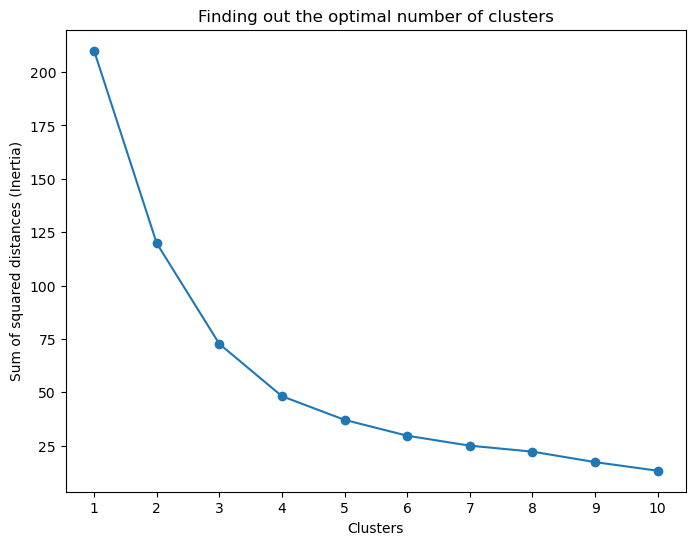

In [137]:
# determining the optimal number of clusters
from sklearn.cluster import KMeans

# Elbow method to determine the optimal number of clusters
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=18)
    kmeans.fit(clustering_df_scaled)
    inertia.append(kmeans.inertia_)

# plotting the Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Finding out the optimal number of clusters')
plt.xticks(ticks=k_range)
plt.xlabel('Clusters')
plt.ylabel('Sum of squared distances (Inertia)')
plt.show()

Based on the Elbow method, the optimal number of clusters is 3 or 4. I'll have a look at the Silhouette score.

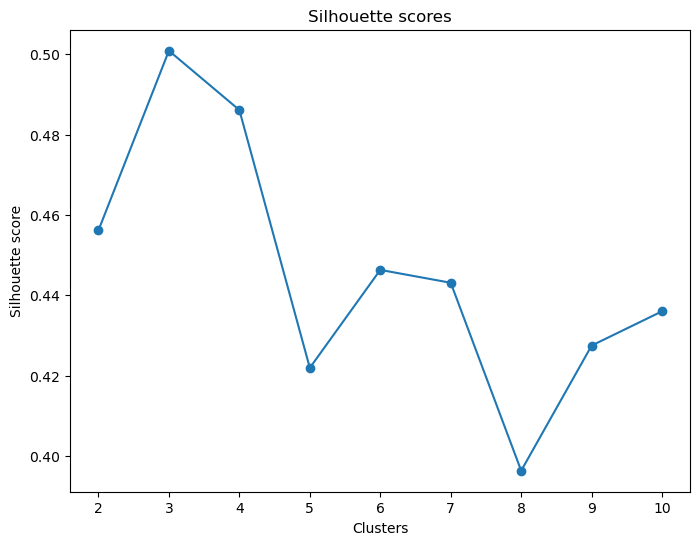

In [139]:
from sklearn.metrics import silhouette_score

sil_scores = []
for k in k_range[1:]:
    kmeans = KMeans(n_clusters=k, random_state=18)
    kmeans.fit(clustering_df_scaled)
    score = silhouette_score(clustering_df_scaled, kmeans.labels_)
    sil_scores.append(score)

plt.figure(figsize=(8, 6))
plt.plot(k_range[1:], sil_scores, marker='o')
plt.title('Silhouette scores')
plt.xlabel('Clusters')
plt.ylabel('Silhouette score')
plt.show()

Based on Silhouette scores, I'll go with 3 clusters.

In [141]:
# applying K-Means with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=18)
kmeans.fit(clustering_df_scaled)

# adding the cluster number to the original dataframe
clustered_countries = co2_prim_en_share_by_country_last.copy()
clustered_countries['Cluster'] = kmeans.labels_

clustered_countries

,Country,ISO3166_alpha3,co2_em_pc,primary_ej_pc,Fossil fuels,Nuclear,Renewable,Cluster
0,Qatar,QAT,60.463063,816.654013,99.373775,0.000000,0.626225,1
1,United Arab Emirates,ARE,35.809262,539.389178,91.836129,5.641995,2.521876,1
2,Turkmenistan,TKM,34.100642,245.825744,99.994098,0.000000,0.005902,1
3,Kuwait,KWT,29.176985,365.931829,99.902582,0.000000,0.097418,1
4,Oman,OMN,23.683151,333.379159,99.036304,0.000000,0.963696,1
...,...,...,...,...,...,...,...,...
65,Peru,PER,2.014301,36.031054,73.650500,0.000000,26.349500,0
66,Morocco,MAR,1.966078,25.808948,91.555226,0.000000,8.444774,1
67,Philippines,PHL,1.397660,18.691137,88.008784,0.000000,11.991216,1
68,Pakistan,PAK,0.923030,14.022148,81.888289,5.953695,12.158016,1


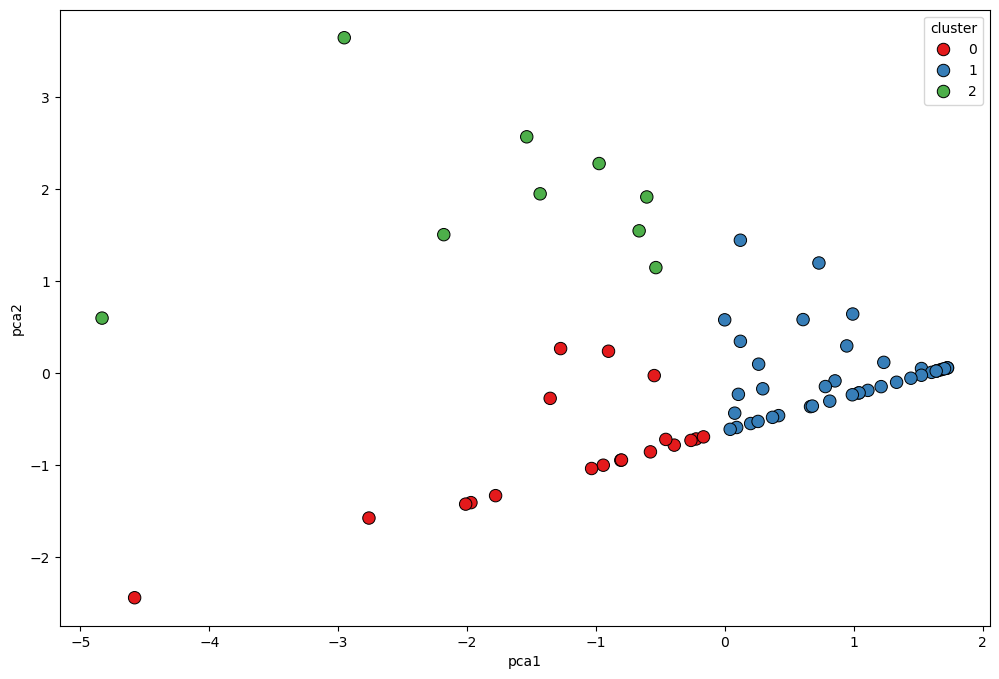

In [142]:
# visualising the clusters
from sklearn.decomposition import PCA

# using PCA to reduce the data to 2 dimensions for visualisation
pca = PCA(n_components=2)
clustered_countries_pca = pca.fit_transform(clustering_df_scaled)

# creating a dataframe with the PCA and clusters
clustered_countries_pca = pd.DataFrame(clustered_countries_pca, columns=['pca1', 'pca2'])
clustered_countries_pca[['cluster', 'country']] = clustered_countries[['Cluster', 'Country']]

# plotting the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=clustered_countries_pca, x='pca1', y='pca2', hue='cluster', palette='Set1', 
                marker='o', s=80, edgecolor='black')

plt.show()

## Bonus (II). Renewable energy projection.

In [144]:
from prophet import Prophet

# selecting data
ren_forecast_df = global_share3.reset_index()[['Year', 'Renewable']].rename(columns={'Year': 'ds',
                                                                                   'Renewable': 'y'})

ren_forecast_df.head()

energy_type,ds,y
0,1965,6.445520
1,1966,6.516204
2,1967,6.423987
3,1968,6.390146
4,1969,6.329960


In [145]:
ren_forecast_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      59 non-null     int64  
 1   y       59 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.0 KB


In [146]:
ren_forecast_df['ds'] = pd.to_datetime(ren_forecast_df['ds'].astype(str), format='%Y')

ren_forecast_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      59 non-null     datetime64[ns]
 1   y       59 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.0 KB


In [147]:
# fitting model
prophet_model = Prophet()
prophet_model.fit(ren_forecast_df)

17:07:49 - cmdstanpy - INFO - Chain [1] start processing
17:07:49 - cmdstanpy - INFO - Chain [1] done processing


In [148]:
# making predictions
future = prophet_model.make_future_dataframe(periods=15, freq='YE')
forecast = prophet_model.predict(future)

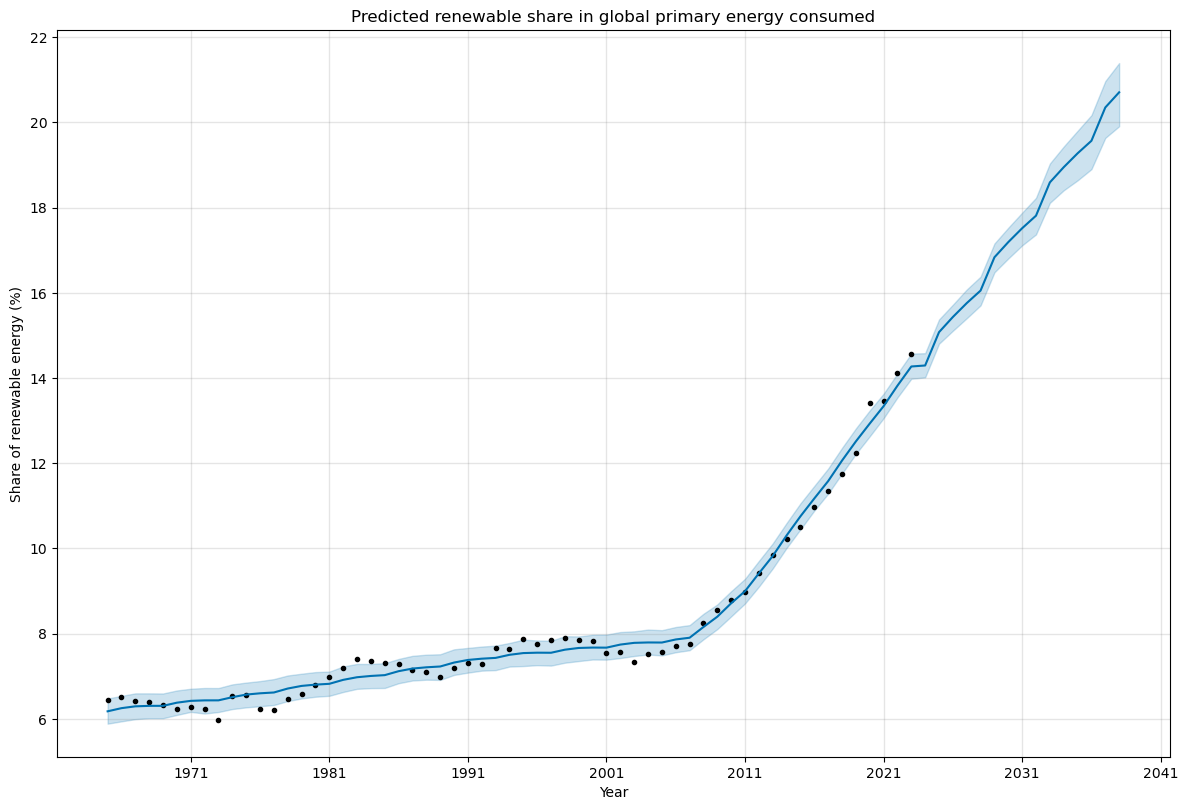

In [149]:
# plotting predictions
prophet_model.plot(forecast, figsize=(12, 8))
plt.title('Predicted renewable share in global primary energy consumed')
plt.xlabel('Year')
plt.ylabel('Share of renewable energy (%)')
plt.show()